In [1]:
!pip install joypy
!pip install waterfallcharts

  Preparing metadata (setup.py) ... - done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=c4d8840f659e94c899357d2bb52c24b78911310901030fdacb4ee1c88fdcc143
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import itertools 
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots

import math
import time
import os

import squarify 
import random

import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
py.offline.init_notebook_mode()

for dirname, _, filenames in os.walk('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1.Data Awareness
Knowing the entire details about the datasets, such as what it is for, why it is and the much more information. This will prevent spending much time on the work and can be easily manifesting.

In [3]:
df = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv', low_memory=False)

In [4]:
df.head(2)

Duration (in seconds)                           Q2  \
0  Duration (in seconds)  What is your age (# years)?   
1                    121                        30-34   

                                       Q3  \
0  What is your gender? - Selected Choice   
1                                     Man   

                                          Q4  \
0  In which country do you currently reside?   
1                                      India   

                                                  Q5  \
0  Are you currently a student? (high school, uni...   
1                                                 No   

                                                Q6_1  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_2  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_3  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_4  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_5  ...  \
0  On which platforms have you begun or completed...  ...   
1                                                NaN  ...   

                                               Q44_3  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_4  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_5  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_6  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_7  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_8  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_9  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_10  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_11  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_12  
0  Who/what are your favorite media sources that ...  
1                                                NaN  

[2 rows x 296 columns]

# 2.Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. We turn the entire lengthy and messy dataset into clean and readable one. So, this will help us to work faster than the time it usually takes with the original dataset.

## 1. Renaming Column Names

In [5]:
df=df.rename(columns = {'Duration (in seconds)':'Duration',
                    'Q2':'Age',
                    'Q3':'Gender',
                    'Q4':'Country',
                    'Q5':'Profession',
                     
                    'Q6_1':'DS-Coursera',
                    'Q6_2':'DS-edx',
                    'Q6_3':'DS-Kaggle Learn',
                    'Q6_4':'DS-DataCamp',
                    'Q6_5':'DS-Fast.ai',
                    'Q6_6':'DS-Udacity',
                    'Q6_7':'DS-Udemy',
                    'Q6_8':'DS-LinkedIn Learning',
                    'Q6_9':'DS-Cloud Certification',
                    'Q6_10':'DS-University Courses',
                    'Q6_11':'DS-None',
                    'Q6_12':'DS-Other',
                     
                     
                    'Q7_1':'Helpful-University Courses',
                    'Q7_2':'Helpful-Online Courses',
                    'Q7_3':'Helpful-Social Media',
                    'Q7_4':'Helpful-Video',
                    'Q7_5':'Helpful-Kaggle',
                    'Q7_6':'Helpful-None',
                    'Q7_7':'Helpful-Other',
                     
                    'Q8':'Highest Education in 2 Yrs',
                    'Q9':'Publications',
                                          
                    'Q10_1':'ML-Research-Theoretical',
                    'Q10_2':'ML-Research-Applied',
                    'Q10_3':'ML-Research-No',
                    
                    'Q11':'Coding Experience',
                     
                    'Q12_1':'Code-Python',
                    'Q12_2':'Code-R',
                    'Q12_3':'Code-SQL',
                    'Q12_4':'Code-C',
                    'Q12_5':'Code-C#',
                    'Q12_6':'Code-C++',
                    'Q12_7':'Code-Java',
                    'Q12_8':'Code-JavaScript',
                    'Q12_9':'Code-Bash',
                    'Q12_10':'Code-PHP',
                    'Q12_11':'Code-MATLAB',
                    'Q12_12':'Code-Julia',
                    'Q12_13':'Code-Go',
                    'Q12_14':'Code-None',
                    'Q12_15':'Code-Other',
                     
                    'Q13_1':'IDE-JupyterLab',
                    'Q13_2':'IDE-RStudio',
                    'Q13_3':'IDE-VisualStudio',
                    'Q13_4':'IDE-VSCode',
                    'Q13_5':'IDE-PyCharm',
                    'Q13_6':'IDE-Spyder',
                    'Q13_7':'IDE-Notepad++',
                    'Q13_8':'IDE-Sublime-Text',
                    'Q13_9':'IDE-Vim/Emacs',
                    'Q13_10':'IDE-MATLAB',
                    'Q13_11':'IDE-JupyterNotebook',
                    'Q13_12':'IDE-IntelliJ',
                    'Q13_13':'IDE-None',
                    'Q13_14':'IDE-Other',
                     
                    'Q14_1':'Notebook-Kaggle',
                    'Q14_2':'Notebook-Colab',
                    'Q14_3':'Notebook-Azure',
                    'Q14_4':'Notebook-CodeOcean',
                    'Q14_5':'Notebook-IBMWatson',
                    'Q14_6':'Notebook-AmazonSageMaker',
                    'Q14_7':'Notebook-AmazonSageMaker Lab',
                    'Q14_8':'Notebook-AmazonEMR',
                    'Q14_9':'Notebook-GoogleCloud VertexAI',
                    'Q14_10':'Notebook-Hex',
                    'Q14_11':'Notebook-Noteable',
                    'Q14_12':'Notebook-Databricks',
                    'Q14_13':'Notebook-Deepnote',
                    'Q14_14':'Notebook-Gradient',
                    'Q14_15':'Notebook-None',
                    'Q14_16':'Notebook-Other',
                     
                    'Q15_1':'Visualization-Matplotlib',
                    'Q15_2':'Visualization-Seaborn',
                    'Q15_3':'Visualization-Plotly/PlotlyExpress',
                    'Q15_4':'Visualization-Ggplot/ggplot2 ',
                    'Q15_5':'Visualization-Shiny',
                    'Q15_6':'Visualization-D3Js',
                    'Q15_7':'Visualization-Altair',
                    'Q15_8':'Visualization-Bokeh',
                    'Q15_9':'Visualization-Geoplotlib',
                    'Q15_10':'Visualization-Leaflet/Folium',
                    'Q15_11':'Visualization-Pygal',
                    'Q15_12':'Visualization-Dygraphs',
                    'Q15_13':'Visualization-Highcharter',
                    'Q15_14':'Visualization-None',
                    'Q15_15':'Visualization-Other',
                     
                    'Q16':'ML Experience(yrs)',
                     
                    'Q17_1':'Framework-Scikit',
                    'Q17_2':'Framework-Tensorflow',
                    'Q17_3':'Framework-Keras',
                    'Q17_4':'Framework-PyTorch',
                    'Q17_5':'Framework-Fast.ai',
                    'Q17_6':'Framework-Xgboost',
                    'Q17_7':'Framework-LightGBM',
                    'Q17_8':'Framework-CatBoost',
                    'Q17_9':'Framework-Caret',
                    'Q17_10':'Framework-TidyModels',
                    'Q17_11':'Framework-JAX',
                    'Q17_12':'Framework-PyTorch Lightning',
                    'Q17_13':'Framework-Huggingface',
                    'Q17_14':'Framework-None',
                    'Q17_15':'Framework-Other',
                     
                    'Q18_1':'Algo-Linear/Logistic',
                    'Q18_2':'Algo-DecisionTrees/RandomForests',
                    'Q18_3':'Algo-GradientBoostingMachines',
                    'Q18_4':'Algo-PyTorch',
                    'Q18_5':'Algo-Fast.ai',
                    'Q18_6':'Algo-Xgboost',
                    'Q18_7':'Algo-LightGBM',
                    'Q18_8':'Algo-CatBoost',
                    'Q18_9':'Algo-Caret',
                    'Q18_10':'Algo-TidyModels',
                    'Q18_11':'Algo-JAX',
                    'Q18_12':'Algo-PyTorch Lightning',
                    'Q18_13':'Algo-Huggingface',
                    'Q18_14':'Algo-None',
                    'Q18_15':'Algo-other',
                     
                    'Q19_1':'Image/video tools',                   
                    'Q19_2':'Image segmentation methods',
                    'Q19_3':'Detection methods',
                    'Q19_4':'Image classification and other general purpose networks',
                    'Q19_5':'Generative Networks',
                    'Q19_6':'Vision Transformer Networks',
                    'Q19_7':'None',
                    'Q19_8':'Other',
                     
                    'Q20_1':'NLP -Word embeddings/vectors(GLoVe,fastText,word2vec)',
                    'Q20_2': 'NLP-Encoder-decoder models(seq2seq, vanilla transformers)',
                    'Q20_3': 'NLP-Contextualized embeddings(ELMo, CoVe)',
                    'Q20_4': 'NLP-Transformer language models',
                    'Q20_5': 'None',
                    'Q20_6': 'Other',


                    'Q21_1':'PreTrainedModel - TensorFlow Hub',
                    'Q21_2': 'PreTrainedModel- PyTorch Hub',
                    'Q21_3': 'PreTrainedModel- Huggingface Models',
                    'Q21_4': 'PreTrainedModel-  Timm',
                    'Q21_5': 'PreTrainedModel- Jumpstart ',
                    'Q21_6': 'PreTrainedModel-ONNX models',
                    'Q21_7': 'PreTrainedModel-NVIDIA NGC models ',
                    'Q21_8': 'PreTrainedModel-Kaggle datasets',
                    'Q21_9': 'None',
                    'Q21_10': 'Other storage services (i.e. google drive)',

                    'Q22':'ML model hubs/repos',
                    'Q23':'Current role',
                    'Q24':'Current employer/contract',
                    'Q25':'Company size',
                    'Q26':'Size of DS Role',
                    'Q27':'Experience in Machine Learning',
                    'Q28_1':'Analyze and understand data to influence product or business decisions',
                    'Q28_2':'Build and/or run the data infrastructure that my business uses for storing',
                    'Q28_3':'Build prototypes to explore applying machine learning to new areas',
                    'Q28_4':'Build and/or run a machine learning service',
                    'Q28_5':'Experimentation and iteration to improve existing ML models',
                    'Q28_6':'Do research that advances the state of the art of machine learning',
                    'Q28_7':'None',
                    'Q28_8':'Others',
                        
                                   
                    'Q29':'Yearly compensation',
                        
                    'Q30':'Past 5 Year Experience in ML/Cloud',
                    'Q31_1':'cloud-AWS',
                    'Q31_2':'Cloud-Microsoft Azure',
                    'Q31_3':'Cloud-GCP',
                    'Q31_4':'Cloud-IBM Cloud/Red Hat',
                    'Q31_5':'Cloud-Oracle',
                    'Q31_6':'Cloud-SAP',
                    'Q31_7':'Cloud-VMware',
                    'Q31_8':'Cloud-Alibaba',
                    'Q31_9':'Cloud-Tencent',
                    'Q31_10':'Cloud- Huawei',
                    'Q31_11':'Cloud-None',
                    'Q31_12':'Cloud-Other',
                                   
                        
                    'Q32':'Count of familiar Cloud platform',
                    'Q33_1':'CloudProduct-Amazon EC2',
                    'Q33_2':'CloudProduct-Microsoft Azure VM',
                    'Q33_3':'CloudProduct-Google Cloud',
                    'Q33_4':'CloudProduct-None',
                    'Q33_5':'CloudProduct-Other',
                        
                        
                    'Q34_1':'StorageProducts-Microsoft Azure Blob Storage',
                    'Q34_2':'StorageProducts-Microsoft Azure Files',
                    'Q34_3':'StorageProducts-Amazon Simple Storage Service (S3)',
                    'Q34_4':'StorageProducts-Amazon Elastic File System (EFS)', 
                    'Q34_5':'StorageProducts-Google Cloud Storage (GCS)',
                    'Q34_6':'StorageProducts-Google Cloud Filestore',
                    'Q34_7':'StorageProducts-No/None',
                    'Q34_8':'StorageProducts-Other',
                        
                        
                    
                    'Q35_1':'DataProducts-MySQL',
                    'Q35_2':'DataProducts-PostgreSQL',
                    'Q35_3':'DataProducts-SQLite',
                    'Q35_4':'DataProducts-Oracle Database',
                    'Q35_5':'DataProducts-MongoDB',
                    'Q35_6':'DataProducts-Snowflake',
                    'Q35_7':'DataProducts-IBM Db2',
                    'Q35_8':'DataProducts-Microsoft SQL Server',
                    'Q35_9':'DataProducts-Microsoft Azure SQL',
                    'Q35_10':'DataProducts-Amazon Redshift',
                    'Q35_11':'DataProducts-Amazon RDS',
                    'Q35_12':'DataProducts-Amazon DynamoDB',
                    'Q35_13':'DataProducts-Google Cloud BigQuery',
                    'Q35_14':'DataProducts-Google Cloud SQL',
                    'Q35_15':'DataProducts-None',
                    'Q35_16':'DataProducts-Other',


                    'Q36_1':'BusinessTool-Amazon QuickSight',
                    'Q36_2':'BusinessTool-Microsoft Power BI',
                    'Q36_3':'BusinessTool-Google Data Studio',
                    'Q36_4':'BusinessTool-Looker',
                    'Q36_5':'BusinessTool-Tableau',
                    'Q36_6':'BusinessTool-Qlik Sense',
                    'Q36_7':'BusinessTool-Domo',
                    'Q36_8':'BusinessTool-TIBCO Spotfire',
                    'Q36_9':'BusinessTool-Alteryx',
                    'Q36_10':'BusinessTool-Sisense',
                    'Q36_11':'BusinessTool-SAP Analytics Cloud',
                    'Q36_12':'BusinessTool-Microsoft Azure Synapse',
                    'Q36_13':'BusinessTool-Thoughtspot',
                    'Q36_14':'BusinessTool-None',
                    'Q36_15':'BusinessTool-Other',


                    'Q37_1':'MLProducts-Amazon SageMaker',
                    'Q37_2':'MLProducts-Azure Machine Learning Studio',
                    'Q37_3':'MLProducts-Google Cloud Vertex AI',
                    'Q37_4':'MLProducts-DataRobot',
                    'Q37_5':'MLProducts-Databricks',
                    'Q37_6':'MLProducts-Dataiku',
                    'Q37_7':'MLProducts-Alteryx',
                    'Q37_8':'MLProducts-Rapidminer',
                    'Q37_9':'MLProducts-C3.ai',
                    'Q37_10':'MLProducts-Domino Data Lab',
                    'Q37_11':'MLProducts-H2O AI Cloud',
                    'Q37_12':'MLProducts-No / None',
                    'Q37_13':'MLProducts-Other',


                    'Q38_1':'Automated_ML_Tools-automated machine learning tools',

                    'Q38_2':'Automated_ML_Tools-H2O Driverless AI',
                    'Q38_3':'Automated_ML_Tools-Databricks AutoML',
                    'Q38_4':'Automated_ML_Tools-DataRobot AutoML',
                    'Q38_5':'Automated_ML_Tools-Amazon Sagemaker Autopilot',
                    'Q38_6':'Automated_ML_Tools-Azure Automated Machine Learning',
                    'Q38_7':'Automated_ML_Tools-No / None',
                    'Q38_8':'Automated_ML_Tools-Other',


                    'Q39_1':'ML_models-TensorFlow Extended (TFX)',
                    'Q39_2':'ML_models-TorchServe',
                    'Q39_3':'ML_models-ONNX Runtime',
                    'Q39_4':'ML_models-Triton Inference Server',
                    'Q39_5':'ML_models-OpenVINO Model Server',
                    'Q39_6':'ML_models-KServe',
                    'Q39_7':'ML_models-BentoML',
                    'Q39_8':'ML_models-Multi Model Server (MMS)',
                    'Q39_9':'ML_models-Seldon Core',
                    'Q39_10':'ML_models-MLflow',
                    'Q39_11':'ML_models-None',
                    'Q39_12':'ML_models-Other',


                    'Q40_1':'MonitoringTool-Neptune.ai',
                    'Q40_2':'MonitoringTool-Weights & Biases',
                    'Q40_3':'MonitoringTool-Comet.ml',
                    'Q40_4':'MonitoringTool-TensorBoard',
                    'Q40_5':'MonitoringTool-Guild.ai',
                    'Q40_6':'MonitoringTool-ClearML',
                    'Q40_7':'MonitoringTool-Mlflow',
                    'Q40_8':'MonitoringTool-Aporia',
                    'Q40_9':'MonitoringTool-Evidently AI',
                    'Q40_10':'MonitoringTool-Arize',
                    'Q40_11':'MonitoringTool-WhyLabs',
                    'Q40_12':'MonitoringTool-Fiddler',
                    'Q40_13':'MonitoringTool-DVC',
                    'Q40_14':'MonitoringTool-No / None',
                    'Q40_15':'MonitoringTool-Other',


                    'Q41_1':'AI products-Google Responsible AI Toolkit',
                    'Q41_2':'AI products-Microsoft Responsible AI Resources',
                    'Q41_3':'AI products-IBM AI Ethics tools',
                    'Q41_4':'AI products-Amazon AI Ethics Tools',
                    'Q41_5':'AI products-The LinkedIn Fairness Toolkit',
                    'Q41_6':'AI products-Audit-AI',
                    'Q41_7':'AI products-Aequitas',
                    'Q41_8':'AI products-None',
                    'Q41_9':'AI products-Other',


                    'Q42_1':'Hardware-GPUs',
                    'Q42_2':'Hardware-TPUs',
                    'Q42_3':'Hardware-IPUs',
                    'Q42_4':'Hardware-RDUs',
                    'Q42_5':'Hardware-WSEs',
                    'Q42_6':'Hardware-Trainium Chips',
                    'Q42_7':'Hardware-Inferentia Chips',
                    'Q42_8':'Hardware-None',
                    'Q42_9':'Hardware-Other',
                    'Q43':'UsageOfTPUs',


                    'Q44_1':'MediaSources-Twitter',
                    'Q44_2':'MediaSources-Email newsletters',
                    'Q44_3':'MediaSources-Reddit',
                    'Q44_4':'MediaSources-Kaggle',
                    'Q44_5':'MediaSources-Course Forums',
                    'Q44_6':'MediaSources-YouTube',
                    'Q44_7':'MediaSources-Podcasts',
                    'Q44_8':'MediaSources-Blogs',
                    'Q44_9':'MediaSources-Journal Publications',
                    'Q44_10':'MediaSources-Slack Communities',
                    'Q44_11':'MediaSources-None',
                    'Q44_12':'MediaSources-Other',

                    })
df=df[1:]
df.head(3)

Duration    Age Gender  Country Profession DS-Coursera DS-edx  \
1      121  30-34    Man    India         No         NaN    NaN   
2      462  30-34    Man  Algeria         No         NaN    NaN   
3      293  18-21    Man    Egypt        Yes    Coursera    edX   

  DS-Kaggle Learn DS-DataCamp DS-Fast.ai  ... MediaSources-Reddit  \
1             NaN         NaN        NaN  ...                 NaN   
2             NaN         NaN        NaN  ...                 NaN   
3             NaN    DataCamp        NaN  ...                 NaN   

               MediaSources-Kaggle MediaSources-Course Forums  \
1                              NaN                        NaN   
2                              NaN                        NaN   
3  Kaggle (notebooks, forums, etc)                        NaN   

                                MediaSources-YouTube  \
1                                                NaN   
2                                                NaN   
3  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   

                               MediaSources-Podcasts MediaSources-Blogs  \
1                                                NaN                NaN   
2                                                NaN                NaN   
3  Podcasts (Chai Time Data Science, O’Reilly Dat...                NaN   

  MediaSources-Journal Publications MediaSources-Slack Communities  \
1                               NaN                            NaN   
2                               NaN                            NaN   
3                               NaN                            NaN   

  MediaSources-None MediaSources-Other  
1               NaN                NaN  
2               NaN                NaN  
3               NaN                NaN  

[3 rows x 296 columns]

## 2. Extract Dataset Information 

In [6]:
df.shape

(23997, 296)

In [7]:
df.dtypes

Duration                             object
Age                                  object
Gender                               object
Country                              object
Profession                           object
                                      ...  
MediaSources-Blogs                   object
MediaSources-Journal Publications    object
MediaSources-Slack Communities       object
MediaSources-None                    object
MediaSources-Other                   object
Length: 296, dtype: object

In [8]:
df.isnull().sum()

Duration                                 0
Age                                      0
Gender                                   0
Country                                  0
Profession                               0
                                     ...  
MediaSources-Blogs                   16231
MediaSources-Journal Publications    20193
MediaSources-Slack Communities       22271
MediaSources-None                    22729
MediaSources-Other                   23162
Length: 296, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 1 to 23997
Columns: 296 entries, Duration to MediaSources-Other
dtypes: object(296)
memory usage: 54.2+ MB


## 3. Removing Trail Spaces

In [10]:
df=df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
df=df.replace(r'^\s*$', np.nan, regex=True)

In [12]:
rows=df.shape[0]
print('Total Number of Respondents: '+ str(rows))

Total Number of Respondents: 23997


# 3. Duration of Survey

In [13]:
df['Duration'] = df['Duration'].apply(float)
durations = df['Duration'][1:].copy()
durations = durations.clip(upper=2000)

#We convert the data type of duration column from 'object' to 'float' for numeric type calculation. 
#And setting the upper limit to avoid visualization for empty set of values.

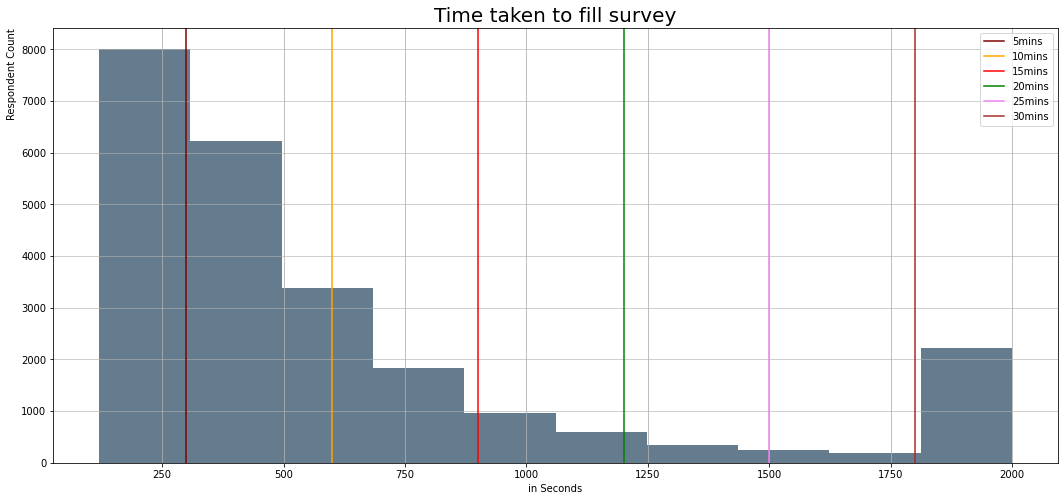

In [14]:
plt.figure(figsize=(18,8))
durations.hist(color='#657c8e')
plt.axvline(x=5*60, color='maroon', linestyle='-', label='5mins')
plt.axvline(x=10*60, color='orange', linestyle='-', label='10mins')
plt.axvline(x=15*60, color='red', linestyle='-', label='15mins')
plt.axvline(x=20*60, color='green', linestyle='-', label='20mins')
plt.axvline(x=25*60, color='violet', linestyle='-', label='25mins')
plt.axvline(x=30*60, color='brown', linestyle='-', label='30mins')
plt.grid(axis='y', alpha=0.75)
plt.title('Time taken to fill survey', fontsize=20)
plt.xlabel('in Seconds')
plt.ylabel('Respondent Count',loc='top')
plt.legend()
plt.show()

#These are some settings of the graph to be displayed beautifully.

In [15]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'], # Spatial coordinates
    z = df.groupby(['Country']).size(), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Population",
    text = df['Country'],
    reversescale=True,
))

fig.update_layout(
    title_text = 'Total Participants',
    geo_scope='world', # limite map scope to USA
)

fig.show()

# 4. Based on Gender plot

In [16]:
df['Gender'].value_counts()

Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: Gender, dtype: int64

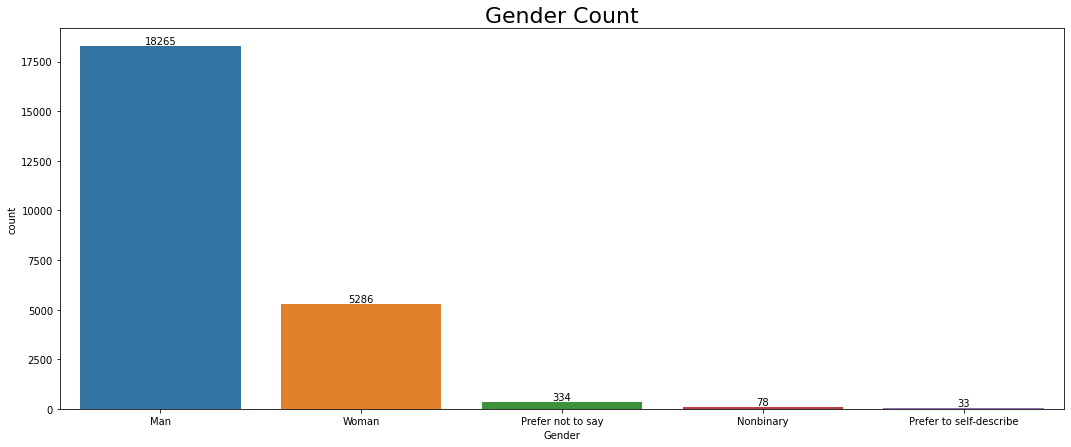

In [17]:
plt.figure(figsize=(18,7))
ROW_ =df.iloc[1:]
GENDERROW_=df['Gender'].iloc[1:]
ax = sns.countplot(x="Gender", data=ROW_, order=GENDERROW_.value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Gender Count', fontsize=22)
plt.show()

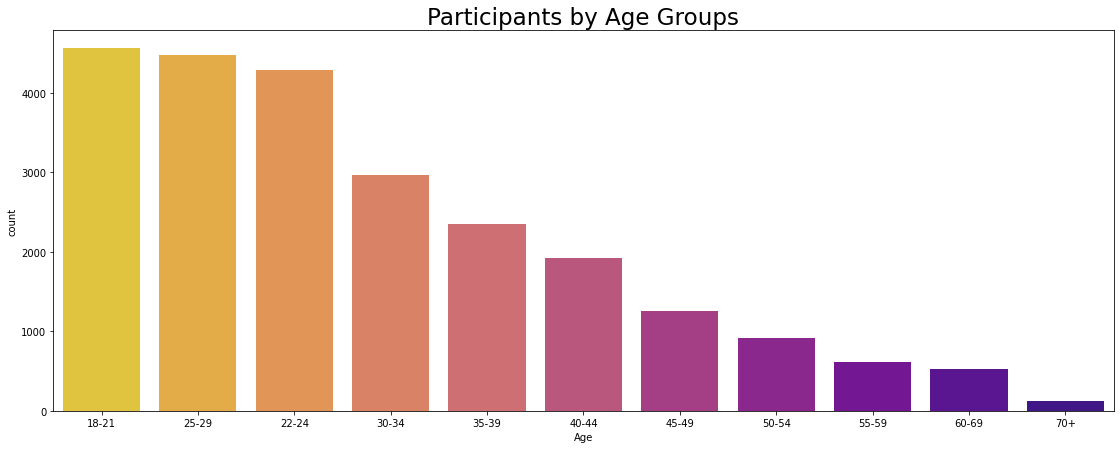

In [18]:
plt.figure(figsize=(19,7))
sns.countplot(x="Age", data=df[1:], order=df['Age'][1:].value_counts().index, palette="plasma_r")
plt.title('Participants by Age Groups', fontsize=23)
plt.show()

# 5. Are you currently a student?

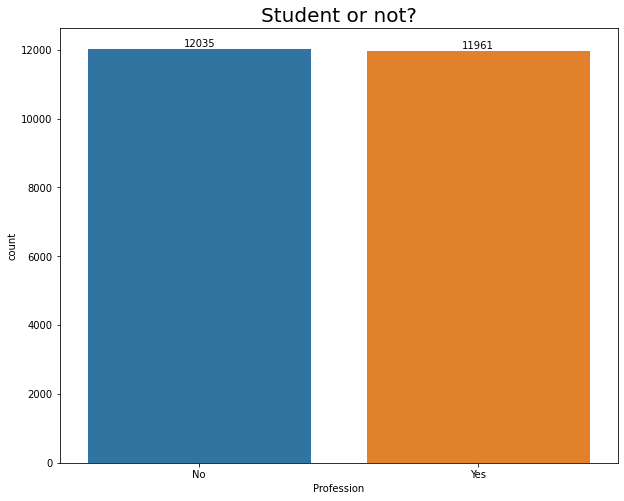

In [19]:
#Following is by the count
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Profession", data=df.iloc[1:], order=df['Profession'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Student or not?', fontsize=20)
plt.show()

In [20]:
#Following is by the percentage value
stu_pro = px.pie(df, values = df['Profession'][1:].value_counts().values,
             names = df['Profession'][1:].value_counts().index, color_discrete_sequence=['#ff7c43','#f95d6a'])

stu_pro.update_traces(textfont_size=25, textfont_color='white', textposition="inside")
stu_pro.update_layout(
    title="Professionalism Count",
    legend_title="Are you a student?",
    font=dict(
        family="Segoe UI",
        size=15
    )
)

stu_pro.show()

Almost the responses we captured from both working professionals and students are same! It's not a big difference. 

# 6. Country-wise plot

In [21]:
country_count = df.groupby(['Country']).size().reset_index().rename(columns={0: 'Count'})
country_count = country_count.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
country_count = country_count[:10]

fig=px.bar(data_frame=country_count,
           x='Country', y='Count',
           color='Country',
           template='gridon',color_discrete_sequence=['#87bc45','#ede15b'],
                 text_auto=True, title="Country Countplot")

fig.update_traces(textfont_size=20, textposition="outside", cliponaxis=False)


fig.update_layout(
    title="Top 10 Countries",
    xaxis_title="Country",
    yaxis_title="Participants Count",
    legend_title="List of Countries",
    font=dict(
        family="Segoe UI",
        size=13
    )
)

fig.show()

The candiadates who filled the survey form lesser than 3600 seconds are plotted above!

# 7. Gender and Age Combination

In [22]:
fig = px.bar(df.iloc[1:].groupby(['Age', 'Gender']).size().reset_index().rename(columns={0: 'count'}), 
             x="Age", 
             y="count", 
             color="Gender",
             template='gridon',
             text_auto=True,
             color_discrete_sequence=["#003f5c","#58508d","#bc5090","#ff6361","#ffa600"])

fig.update_traces(textfont_size=17, textposition="outside", cliponaxis=False)
fig.update_layout(
    title="Gender Count",
    xaxis_title="Gender",
    yaxis_title="Participants Count",
    legend_title="Gender",
    font=dict(
        family="Segoe UI",
        size=13
    )
)
fig.show()

# 8. On which platforms have you begun or completed data science courses?

In [23]:
Q6_choices = df.iloc[:,5:17]
Q6_choices.drop(Q6_choices.loc[Q6_choices[
 'DS-Cloud Certification']==np.nan].index, inplace=True)

In [24]:
q6choicelist = Q6_choices.iloc[:,0:17]
q6choicelist

DS-Coursera DS-edx       DS-Kaggle Learn DS-DataCamp DS-Fast.ai  \
1             NaN    NaN                   NaN         NaN        NaN   
2             NaN    NaN                   NaN         NaN        NaN   
3        Coursera    edX                   NaN    DataCamp        NaN   
4        Coursera    NaN  Kaggle Learn Courses         NaN        NaN   
5             NaN    NaN                   NaN         NaN        NaN   
...           ...    ...                   ...         ...        ...   
23993         NaN    NaN                   NaN         NaN        NaN   
23994         NaN    NaN                   NaN         NaN        NaN   
23995         NaN    NaN                   NaN    DataCamp        NaN   
23996         NaN    NaN  Kaggle Learn Courses         NaN        NaN   
23997         NaN    NaN                   NaN         NaN        NaN   

      DS-Udacity DS-Udemy DS-LinkedIn Learning DS-Cloud Certification  \
1            NaN      NaN                  NaN                    NaN   
2            NaN      NaN                  NaN                    NaN   
3        Udacity    Udemy    LinkedIn Learning                    NaN   
4            NaN    Udemy                  NaN                    NaN   
5            NaN      NaN                  NaN                    NaN   
...          ...      ...                  ...                    ...   
23993        NaN      NaN                  NaN                    NaN   
23994        NaN      NaN                  NaN                    NaN   
23995        NaN    Udemy                  NaN                    NaN   
23996    Udacity      NaN                  NaN                    NaN   
23997        NaN      NaN                  NaN                    NaN   

                                   DS-University Courses DS-None DS-Other  
1                                                    NaN     NaN    Other  
2      University Courses (resulting in a university ...     NaN      NaN  
3      University Courses (resulting in a university ...     NaN      NaN  
4                                                    NaN     NaN    Other  
5                                                    NaN     NaN    Other  
...                                                  ...     ...      ...  
23993                                                NaN    None      NaN  
23994  University Courses (resulting in a university ...     NaN      NaN  
23995                                                NaN     NaN      NaN  
23996  University Courses (resulting in a university ...     NaN      NaN  
23997                                                NaN     NaN    Other  

[23997 rows x 12 columns]

In [25]:
cols,value_counts=[],[]
for i in q6choicelist.columns:
    cols.append(q6choicelist[i].unique()[1])
    value_counts.append(q6choicelist[i].value_counts()[0])
q6choicelist.columns = cols
agg_data = dict(zip(cols, value_counts))
agg_data = pd.Series(agg_data, index = None)                     
agg_data = pd.DataFrame(agg_data).reset_index()          
agg_data.columns = ['Learning Platform','Total Count']
agg_data = agg_data.sort_values(by=['Total Count'],ascending=False) 
agg_data = agg_data.reset_index(drop=True)
agg_data

Learning Platform  Total Count
0                                            Coursera         9699
1   University Courses (resulting in a university ...         6780
2                                Kaggle Learn Courses         6628
3                                               Udemy         6116
4                                                 NaN         5669
5                                            DataCamp         3718
6                                   LinkedIn Learning         2766
7                                                None         2643
8                                                 edX         2474
9                                             Udacity         2199
10  Cloud-certification programs (direct from AWS,...         1821
11                                            Fast.ai          944

In [26]:
sns.set(font_scale=1)

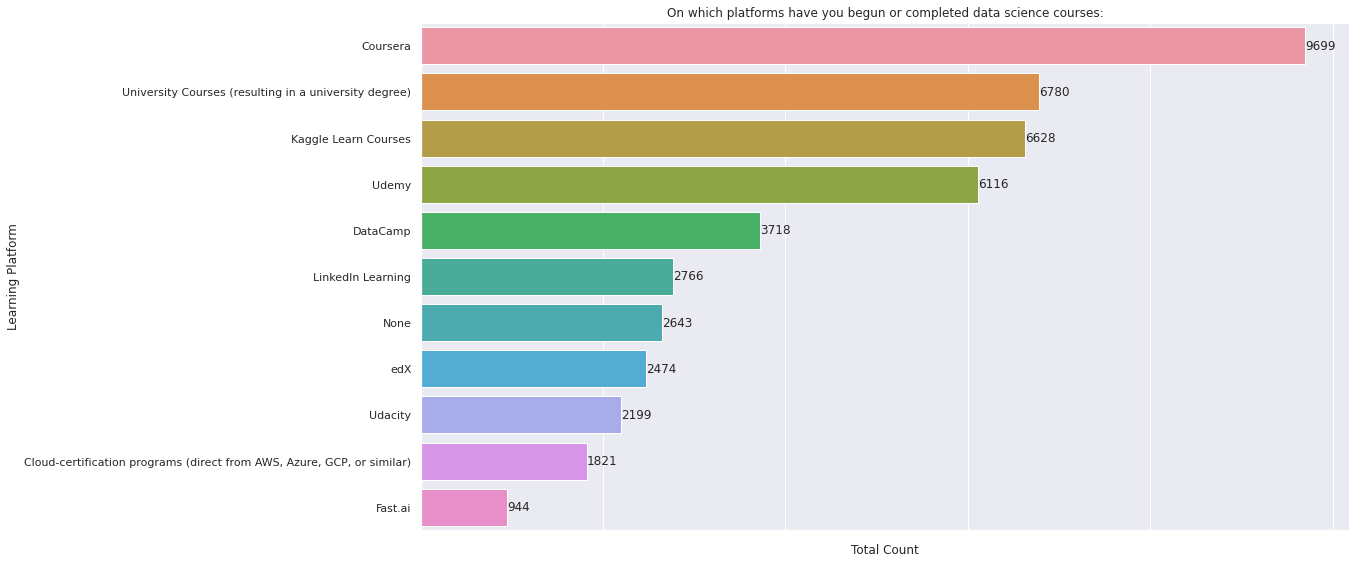

In [27]:
f, ax = plt.subplots(figsize=(19, 8))
ax = sns.barplot(x=agg_data['Total Count'],y= agg_data['Learning Platform']);
ax.bar_label(ax.containers[0])
ax.set_title("On which platforms have you begun or completed data science courses:")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

plt.show()

# 9. Most helpful platform when you first started studying data science

In [28]:
Q7_choices = df.iloc[:,17:24]
Q7_choices.drop(Q7_choices.loc[Q7_choices['Helpful-University Courses']==np.nan].index, inplace=True)

In [29]:
cols,value_counts=[],[]
for i in Q7_choices.columns:
    cols.append(Q7_choices[i].unique()[1])
    value_counts.append(Q7_choices[i].value_counts()[0])
Q7_choices.columns = cols
agg_data = dict(zip(cols, value_counts))
agg_data = pd.Series(agg_data, index = None)                     
agg_data = pd.DataFrame(agg_data).reset_index()          
agg_data.columns = ['Platform','Total Count']
agg_data = agg_data.sort_values(by=['Total Count'],ascending=False) 
agg_data = agg_data.reset_index(drop=True)
agg_data

Platform  Total Count
0            Online courses (Coursera, EdX, etc)        13714
1         Video platforms (YouTube, Twitch, etc)        12871
2          Kaggle (notebooks, competitions, etc)        12700
3                             University courses         6851
4  Social media platforms (Reddit, Twitter, etc)         3310
5                                          Other         1944
6             None / I do not study data science         1022

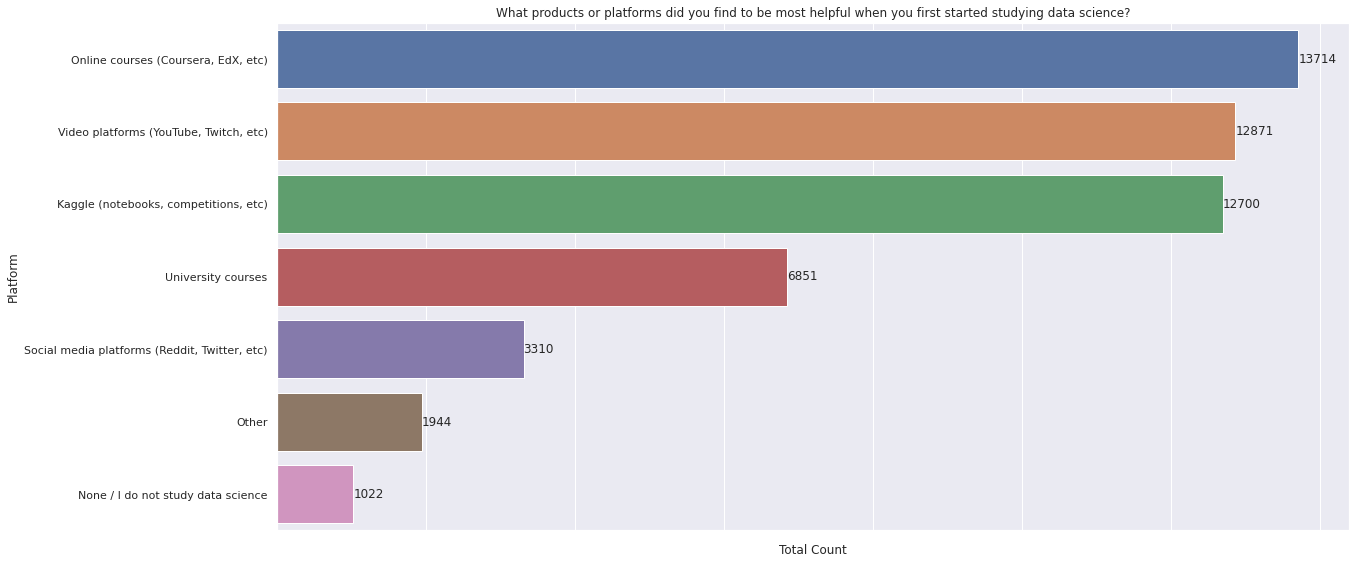

In [30]:
f, ax = plt.subplots(figsize=(19, 8))
ax = sns.barplot(x=agg_data['Total Count'],y= agg_data['Platform']);
ax.bar_label(ax.containers[0])
ax.set_title("What products or platforms did you find to be most helpful when you first started studying data science?")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

plt.show()

# 14. Daily use IDEs

In [31]:
Q13_choices = df.iloc[:,45:59]

In [32]:
cols,value_counts=[],[]
for i in Q13_choices.columns:
    cols.append(Q13_choices[i].unique()[1])
    value_counts.append(Q13_choices[i].value_counts()[0])
Q13_choices.columns=cols
agg_data=dict(zip(cols,value_counts))
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['IDE','value counts']
agg_data

IDE  value counts
0                    JupyterLab          4887
1                       RStudio          3824
2                 Visual Studio          4416
3   Visual Studio Code (VSCode)          9976
4                       PyCharm          6099
5                        Spyder          2880
6                     Notepad++          3891
7                  Sublime Text          2218
8                   Vim / Emacs          1448
9                        MATLAB          2302
10             Jupyter Notebook         13684
11                     IntelliJ          1612
12                         None           409
13                        Other          1474

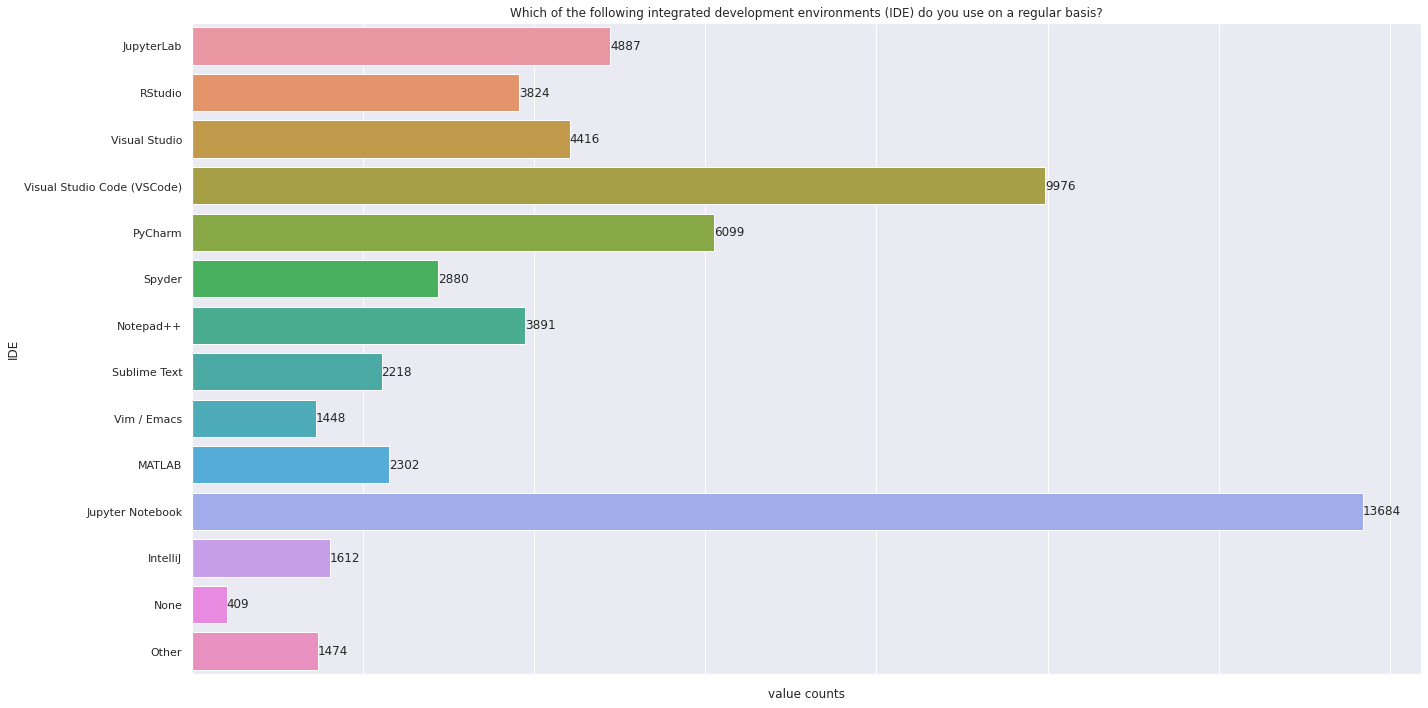

In [33]:
f, ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['IDE'])
ax.bar_label(ax.containers[0])
ax.set_title('Which of the following integrated development environments (IDE) do you use on a regular basis?')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

# 15. Do you use any of the hosted notebook products?

In [34]:
Q14_choices=df.iloc[:, 59:75]

In [35]:
cols, value_cnts=[],[]
for i in Q14_choices.columns:
    cols.append(Q14_choices[i].unique()[1])
    value_cnts.append(Q14_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q14_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['Notebook Products','value counts']
agg_data

Notebook Products  value counts
0                     Kaggle Notebooks          7478
1                      Colab Notebooks          8929
2                      Azure Notebooks           885
3                           Code Ocean           158
4                    IBM Watson Studio           964
5              Amazon Sagemaker Studio           735
6          Amazon Sagemaker Studio Lab           545
7                 Amazon EMR Notebooks           260
8     Google Cloud Vertex AI Workbench           870
9                       Hex Workspaces            77
10                  Noteable Notebooks           299
11  Databricks Collaborative Notebooks           610
12                  Deepnote Notebooks           294
13                  Gradient Notebooks           244
14                                None          6740
15                               Other           582

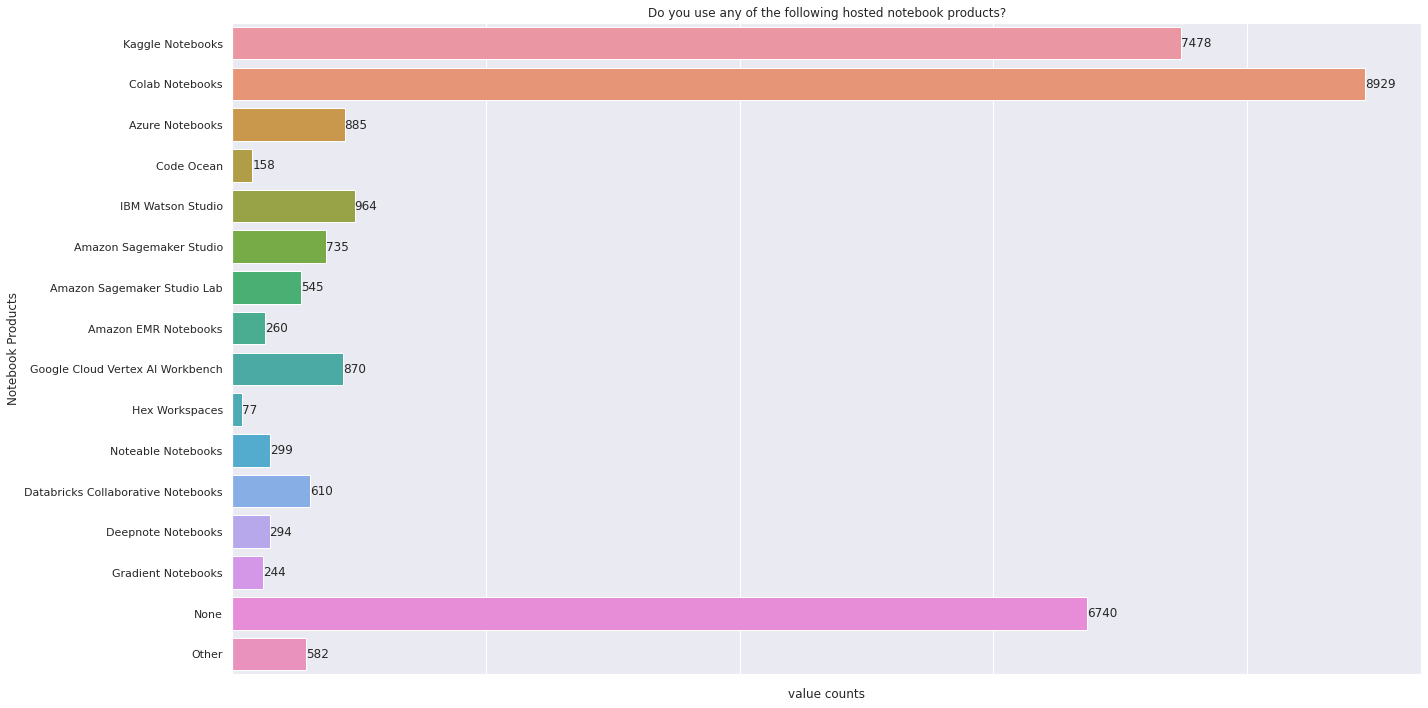

In [36]:
f, ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['Notebook Products'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following hosted notebook products?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

# 16. Highly Using Data Visualization Library

In [37]:
Q15_choices=df.iloc[:, 75:90]

In [38]:
cols, value_cnts=[],[]
for i in Q15_choices.columns:
    cols.append(Q15_choices[i].unique()[1])
    value_cnts.append(Q15_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q15_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['Visualisation Libraries','value counts']
agg_data

Visualisation Libraries  value counts
0                Matplotlib         14010
1                   Seaborn         10512
2   Plotly / Plotly Express          5078
3          Ggplot / ggplot2          4145
4                     Shiny          1043
5                     D3 js           734
6                    Altair           300
7                     Bokeh           771
8                Geoplotlib          1167
9          Leaflet / Folium           554
10                    Pygal           318
11                 Dygraphs           225
12              Highcharter           198
13                     None          3439
14                    Other           691

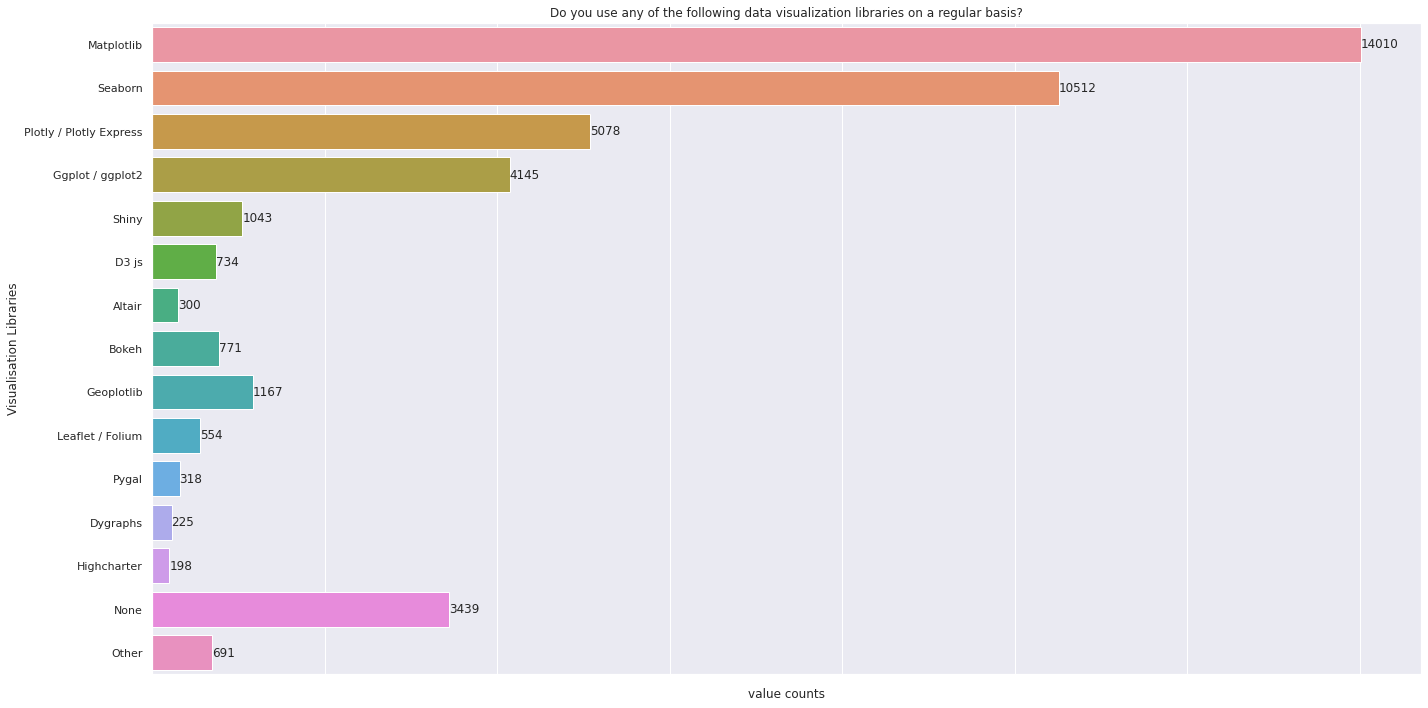

In [39]:
f, ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['Visualisation Libraries'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following data visualization libraries on a regular basis?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

# 17. For how many years have you used machine learning methods?

In [40]:
Q16=df.iloc[:, 90]
Q16=pd.DataFrame(Q16)
Q16

ML Experience(yrs)
1                                        NaN
2                               Under 1 year
3                                  1-2 years
4                                  1-2 years
5      I do not use machine learning methods
...                                      ...
23993                              1-2 years
23994                              2-3 years
23995                           Under 1 year
23996                           Under 1 year
23997                           Under 1 year

[23997 rows x 1 columns]

In [41]:
fig = px.pie(df, values = df['ML Experience(yrs)'][1:].value_counts().values,
             names = df['ML Experience(yrs)'][1:].value_counts().index)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(    
    annotations=[dict(text='ML Skill', font_size=20, showarrow=False),
                dict(text='(in years)',y=0.45,  font_size=15, showarrow=False)]
)
fig.show()

# 18. Mostly used ML frameworks 

In [42]:
import plotly.graph_objects as go

In [43]:
Q17_choices=df.iloc[:, 91:106]

In [44]:
cols,value_cnts=[],[]
for i in Q17_choices.columns:
    cols.append(Q17_choices[i].unique()[1])
    value_cnts.append(Q17_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q17_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['machine learning frameworks','value counts']
agg_data

machine learning frameworks  value counts
0                 Scikit-learn         11403
1                   TensorFlow          7953
2                        Keras          6575
3                      PyTorch          5191
4                      Fast.ai           648
5                      Xgboost          4477
6                     LightGBM          1940
7                     CatBoost          1165
8                        Caret           821
9                   Tidymodels           547
10                         JAX           252
11           PyTorch Lightning          1013
12                 Huggingface          1332
13                        None          1709
14                       Other           620

In [45]:
fig = px.area(agg_data, x="machine learning frameworks", y="value counts", color="machine learning frameworks", hover_data = ['value counts'],line_group="machine learning frameworks")
fig.update_layout(hovermode='y unified')
fig.show()

# 19. ML algorithms do you use on a regular basis

In [46]:
Q18_choices=df.iloc[:, 106:120]

In [47]:
cols,value_cnts=[],[]
for i in Q18_choices.columns:
    cols.append(Q18_choices[i].unique()[1])
    value_cnts.append(Q18_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q18_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['ML algorithms','value counts']
agg_data

ML algorithms  value counts
0                       Linear or Logistic Regression         11338
1                    Decision Trees or Random Forests          9373
2   Gradient Boosting Machines (xgboost, lightgbm,...          5506
3                                 Bayesian Approaches          3661
4                             Evolutionary Approaches           823
5                   Dense Neural Networks (MLPs, etc)          3476
6                       Convolutional Neural Networks          6006
7                     Generative Adversarial Networks          1166
8                           Recurrent Neural Networks          3451
9             Transformer Networks (BERT, gpt-3, etc)          2196
10               Autoencoder Networks (DAE, VAE, etc)          1234
11                              Graph Neural Networks          1422
12                                               None          1326
13                                              Other           538

In [48]:
fig = px.area(agg_data, x="ML algorithms", y="value counts", color="ML algorithms", line_group="ML algorithms")

fig.show()

# 20. Computer vision methods usage

In [49]:
Q19_choices=df.iloc[:, 120:128]

In [50]:
cols, value_cnts=[],[]
for i in Q19_choices.columns:
    cols.append(Q19_choices[i].unique()[1])
    value_cnts.append(Q19_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q19_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['Computer Vision method','value counts']
agg_data

Computer Vision method  value counts
0  General purpose image/video tools (PIL, cv2, s...          2293
1  Image segmentation methods (U-Net, Mask R-CNN,...          2495
2  Object detection methods (YOLOv6, RetinaNet, etc)          2525
3  Image classification and other general purpose...          3664
4                Generative Networks (GAN, VAE, etc)          1343
5  Vision transformer networks (ViT, DeiT, BiT, B...           782
6                                               None          1455
7                                              Other           146

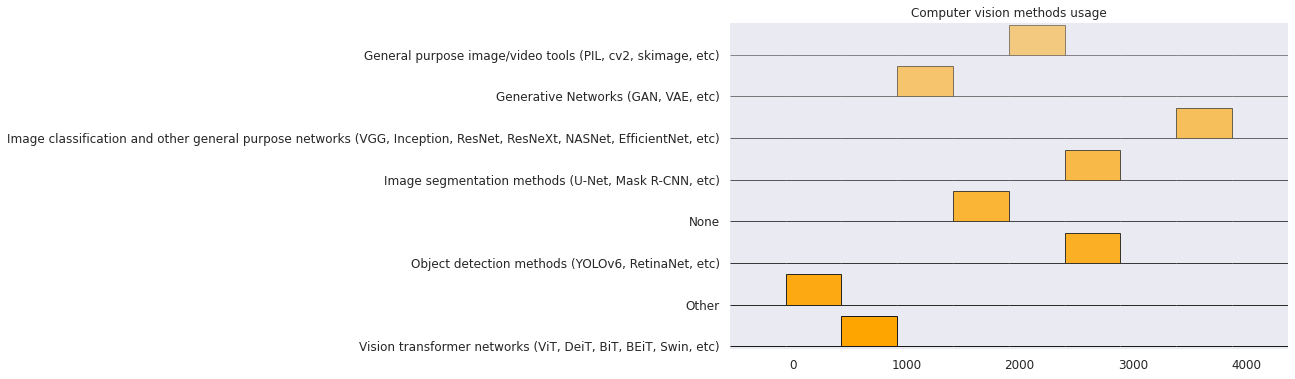

In [51]:
from joypy import joyplot
joyplot(agg_data, by = 'Computer Vision method', column = 'value counts', color = 'Orange', fade = True,
        range_style='own', figsize = (10,6), hist = True, overlap = 0,
       title='Computer vision methods usage',xlabels=True, ylabels=True)

plt.show()

**Image classification methods** are the most-used techniques here

# 21. Highly-used Natural Language Processing

In [52]:
Q20_choices=df.iloc[:, 128:134]
cols, value_cnts=[],[]
for i in Q20_choices.columns:
    cols.append(Q20_choices[i].unique()[1])
    value_cnts.append(Q20_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q20_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['Natural Language Processing','value counts']
agg_data

Natural Language Processing  value counts
0  Word embeddings/vectors (GLoVe, fastText, word...          2241
1  Encoder-decoder models (seq2seq, vanilla trans...          1701
2             Contextualized embeddings (ELMo, CoVe)           685
3  Transformer language models (GPT-3, BERT, XLne...          2219
4                                               None          1107
5                                              Other           126

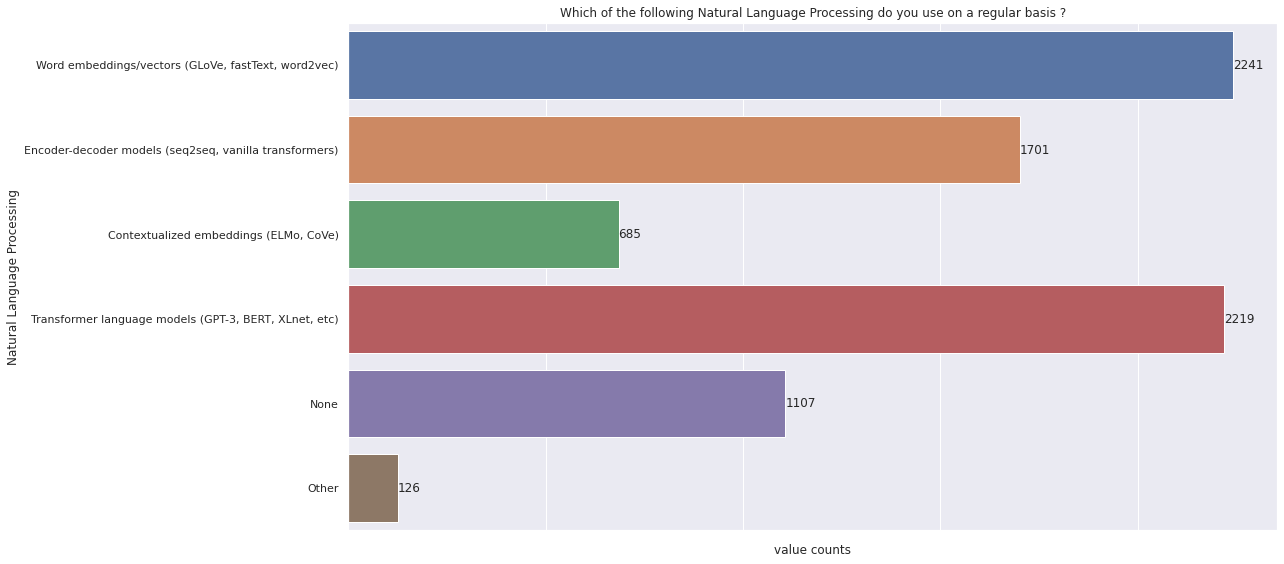

In [53]:
f, ax=plt.subplots(figsize=(18,8))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['Natural Language Processing'])
ax.bar_label(ax.containers[0])
ax.set_title('Which of the following Natural Language Processing do you use on a regular basis ?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

# 22. Do you download pre-trained model weights from any of the following services?

In [54]:
Q21_choices=df.iloc[:, 134:144]
cols, value_cnts=[],[]
for i in Q21_choices.columns:
    cols.append(Q21_choices[i].unique()[1])
    value_cnts.append(Q21_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q21_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['Pre-Trained model weigths','value counts']
agg_data


Pre-Trained model weigths  value counts
0                                     TensorFlow Hub          3087
1                                        PyTorch Hub          2012
2                                 Huggingface Models          1793
3                                               Timm           434
4                                          Jumpstart           237
5                                        ONNX models           418
6                                  NVIDIA NGC models           630
7                                    Kaggle datasets          5422
8  No, I do not download pre-trained model weight...          7122
9         Other storage services (i.e. google drive)           703

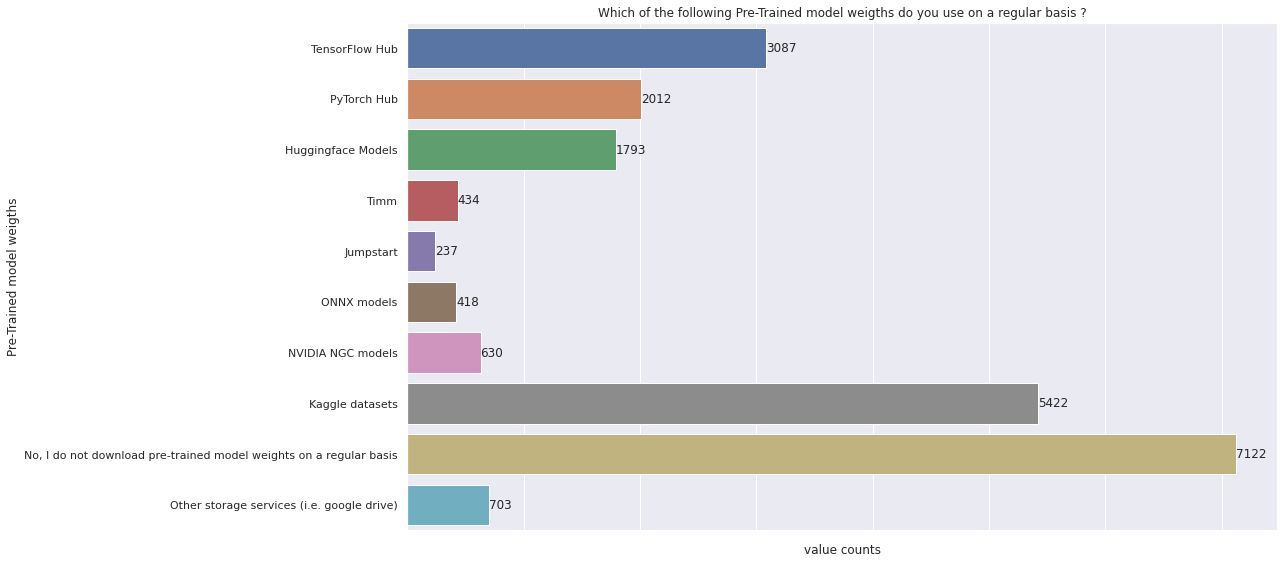

In [55]:
f, ax=plt.subplots(figsize=(18,8))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['Pre-Trained model weigths'])
ax.bar_label(ax.containers[0])
ax.set_title('Which of the following Pre-Trained model weigths do you use on a regular basis ?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

# 23. Most used ML model hubs or repos

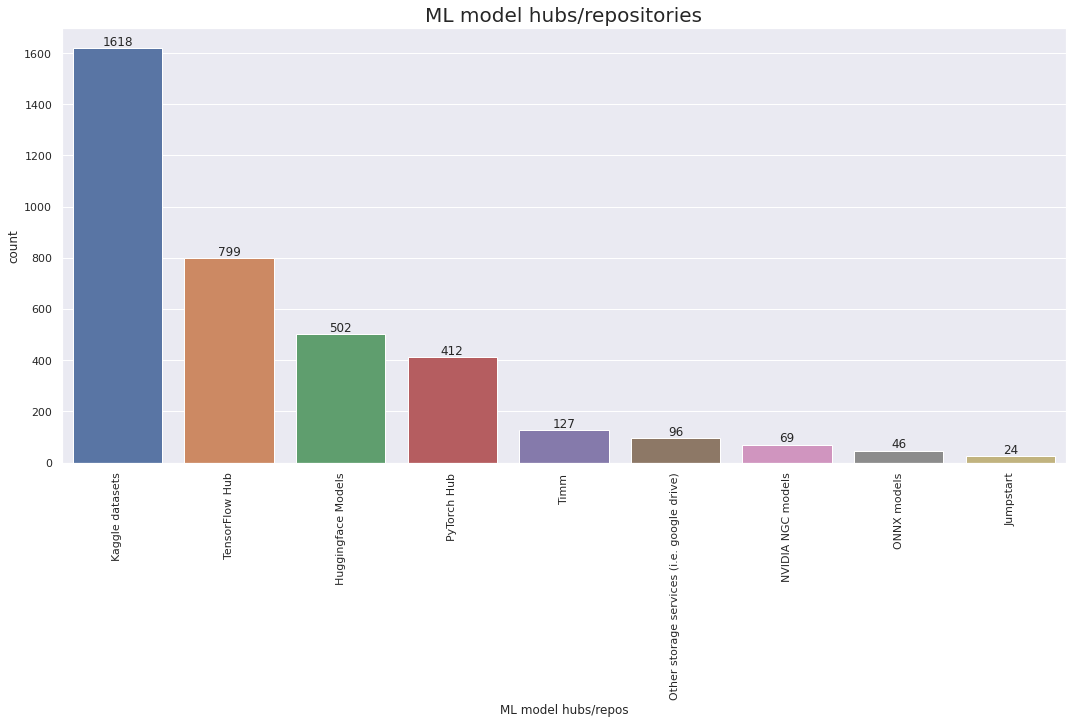

In [56]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x='ML model hubs/repos', data=df.iloc[1:], order=df['ML model hubs/repos'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('ML model hubs/repositories', fontsize=20)
ax.tick_params(axis='x', rotation=90)
plt.show()

# 24. In what industry is your current employer/contract (or your most recent employer if retired)?

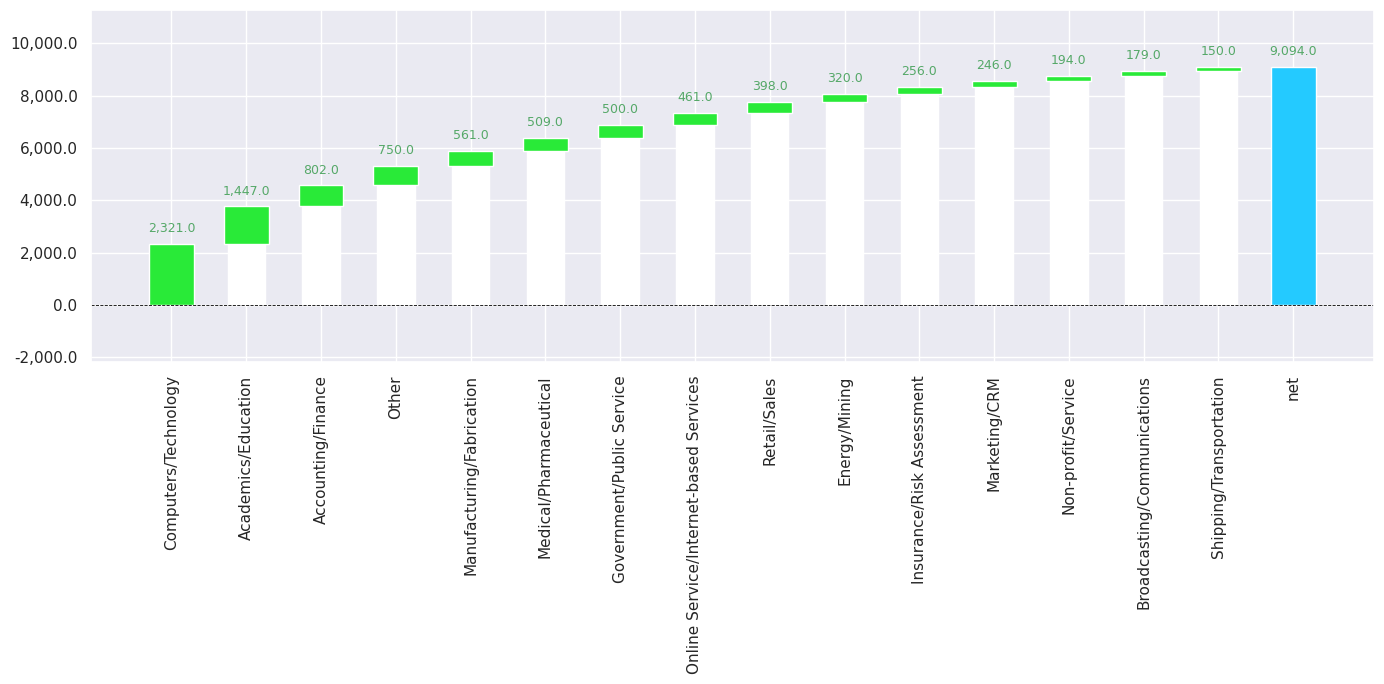

In [57]:
import waterfall_chart

plt.rcParams.update({'figure.figsize':(14,7), 'figure.dpi':100})
waterfall_chart.plot(df['Current employer/contract'].iloc[1:].value_counts().index,
                     df['Current employer/contract'].iloc[1:].value_counts(),
                     sorted_value=True,rotation_value=90);

# 25. What is the size of the company where you are employed?

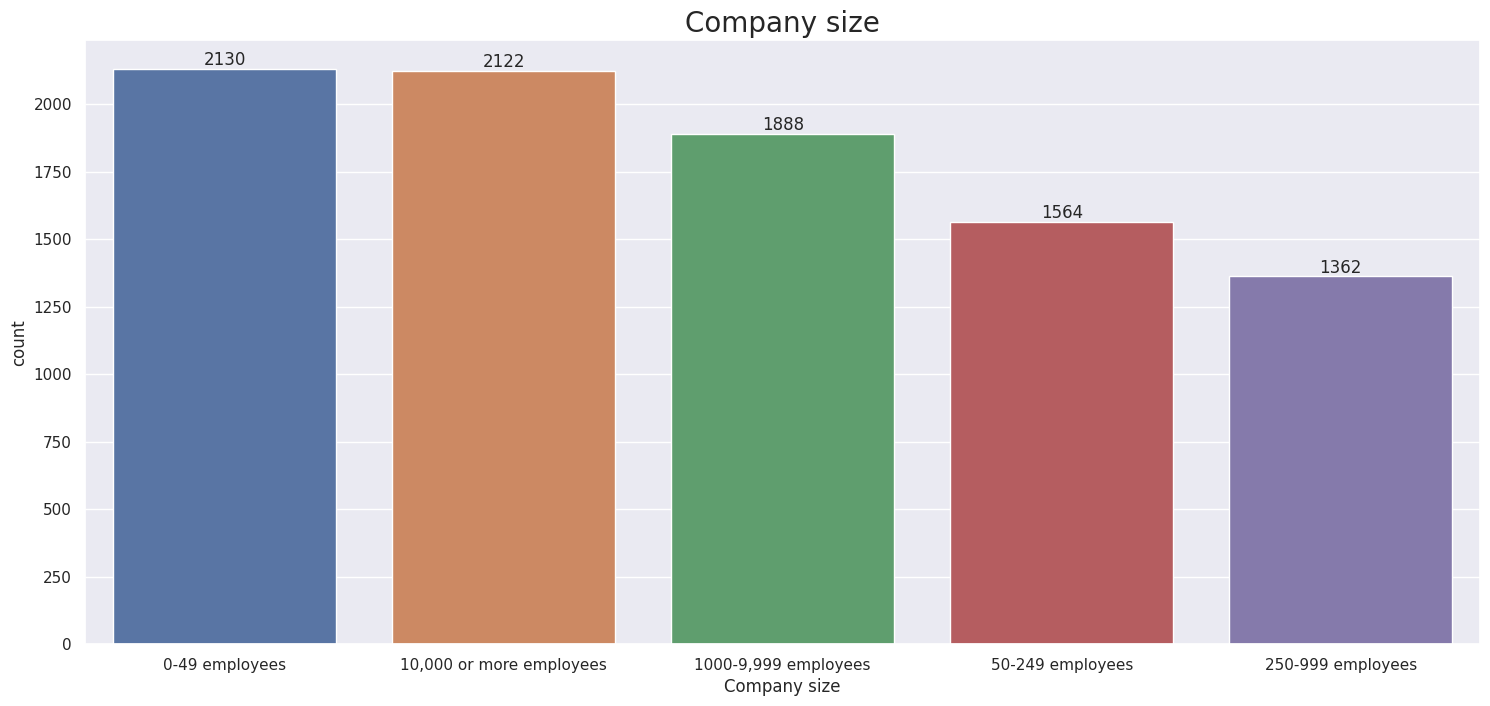

In [58]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Company size', data=df.iloc[1:], order=df['Company size'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Company size', fontsize=20)
plt.show()

# 26. Approximately how many individuals are responsible for data science workloads at your place of business?

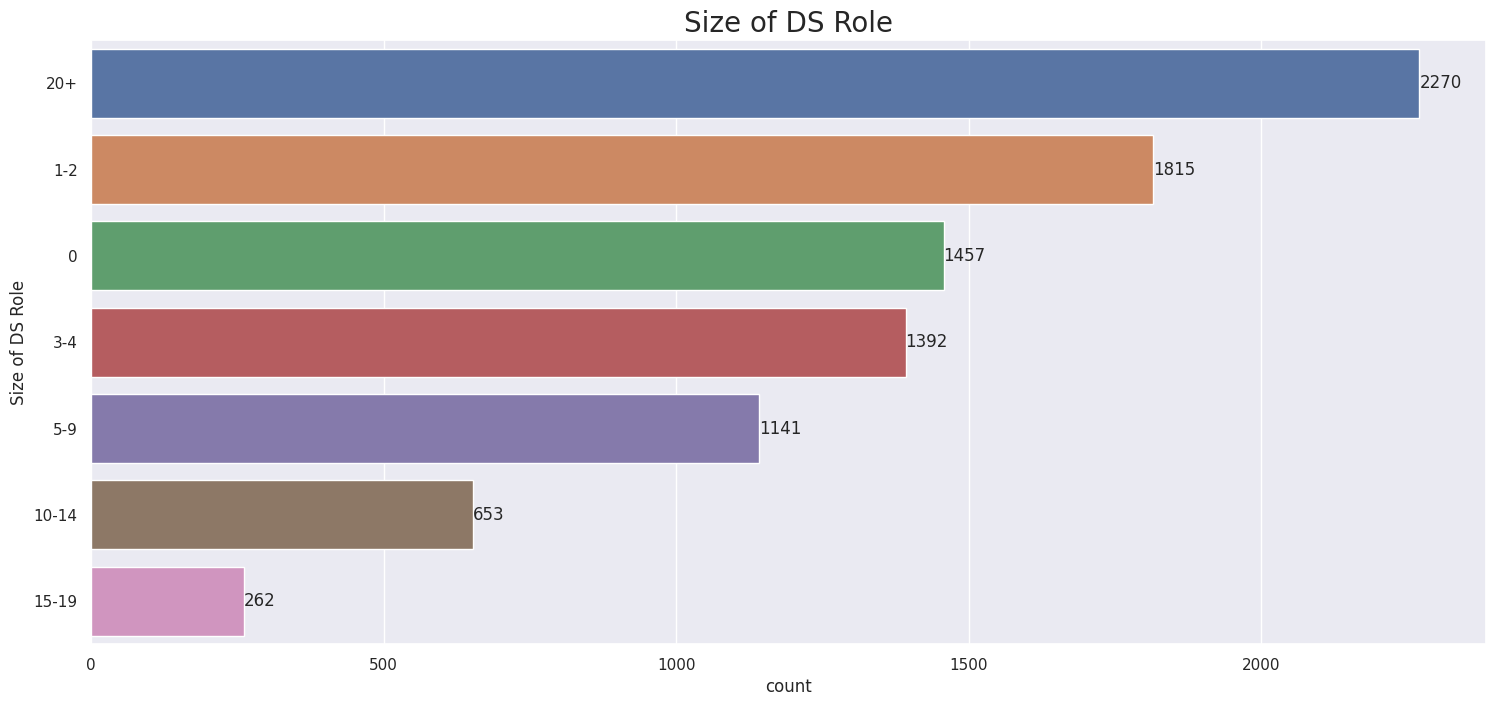

In [59]:
plt.figure(figsize=(18,8))
ax = sns.countplot(y='Size of DS Role', data=df.iloc[1:], order=df['Size of DS Role'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Size of DS Role', fontsize=20)
plt.show()

# 27. Experience in Machine Learning

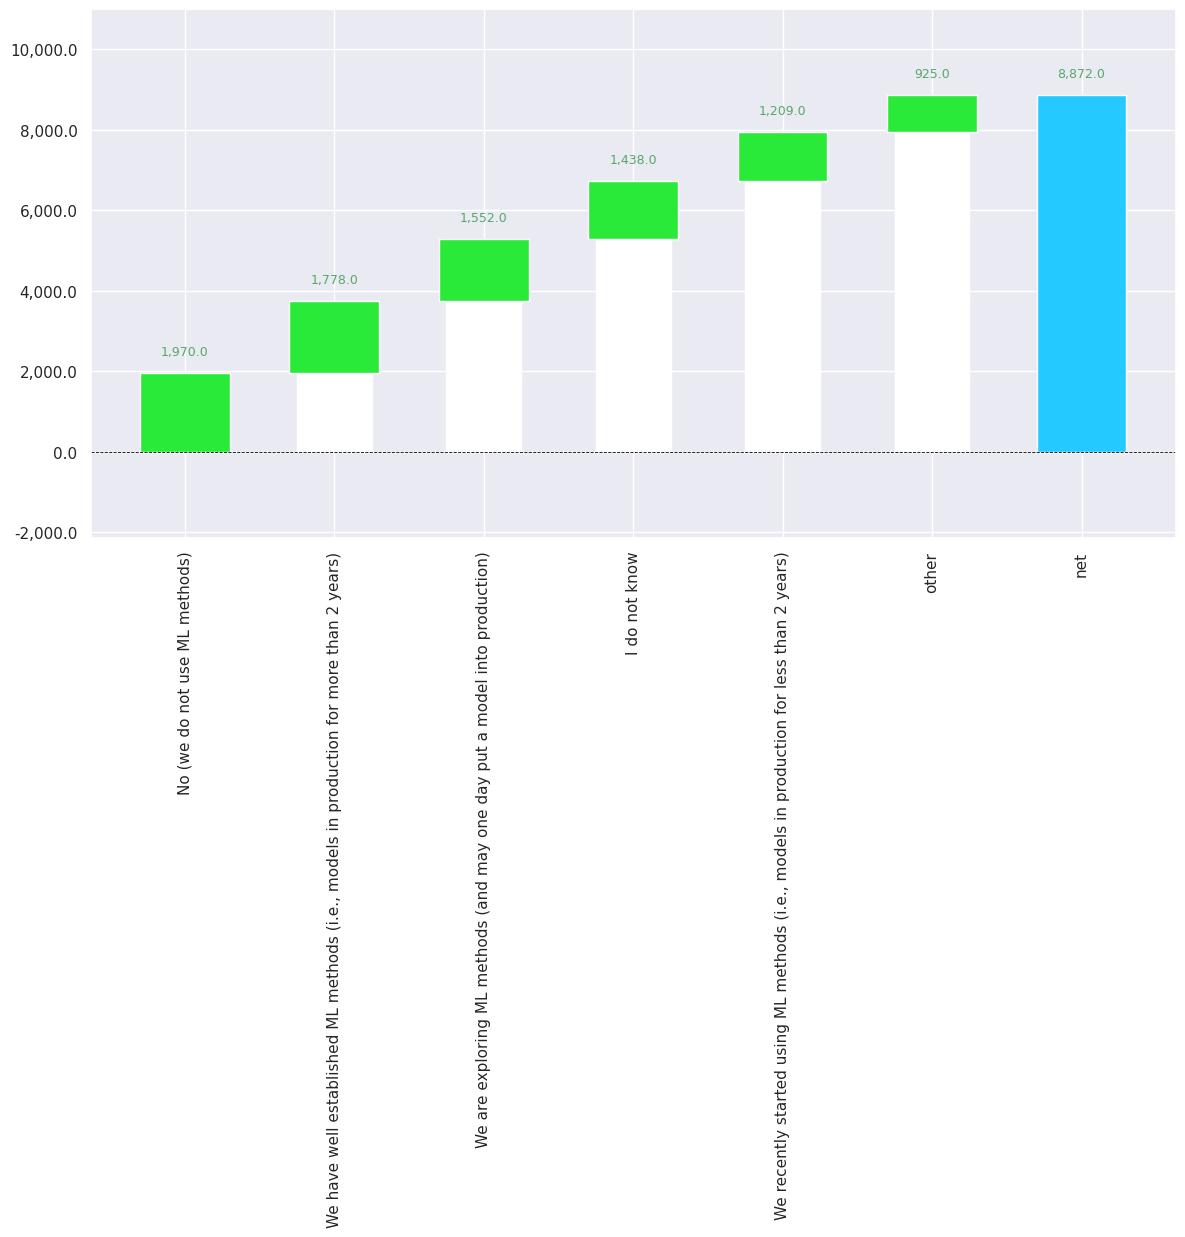

In [60]:
plt.rcParams.update({'figure.figsize':(14,7), 'figure.dpi':100})
waterfall_chart.plot(df['Experience in Machine Learning'].iloc[1:].value_counts().index,
                     df['Experience in Machine Learning'].iloc[1:].value_counts(),
                     sorted_value=True,threshold=0.5,rotation_value=90);


# 28. Activities that make up an important part of your role at work

In [61]:
Q28_choices=df.iloc[:, 150:158]

In [62]:
cols,value_cnts=[],[]
for i in Q28_choices.columns:
    cols.append(Q28_choices[i].unique()[1])
    value_cnts.append(Q28_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q28_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['important part of role','value counts']
agg_data

important part of role  value counts
0  Analyze and understand data to influence produ...          4999
1  Build and/or run the data infrastructure that ...          2622
2  Build prototypes to explore applying machine l...          3034
3  Build and/or run a machine learning service th...          2171
4  Experimentation and iteration to improve exist...          2352
5  Do research that advances the state of the art...          1663
6  None of these activities are an important part...          1444
7                                              Other           486

In [63]:
fig = px.scatter(agg_data, x="value counts", y="important part of role",color="important part of role", size='value counts')
fig.update_layout(showlegend=False)
fig

# 29. What is your current yearly compensation (approximate $USD)?

In [64]:
Q29=df.iloc[:,158]
Q29=pd.DataFrame(Q29)
Q29=Q29.groupby(['Yearly compensation']).size().reset_index()
Q29.columns=['Yearly compensation','value counts']

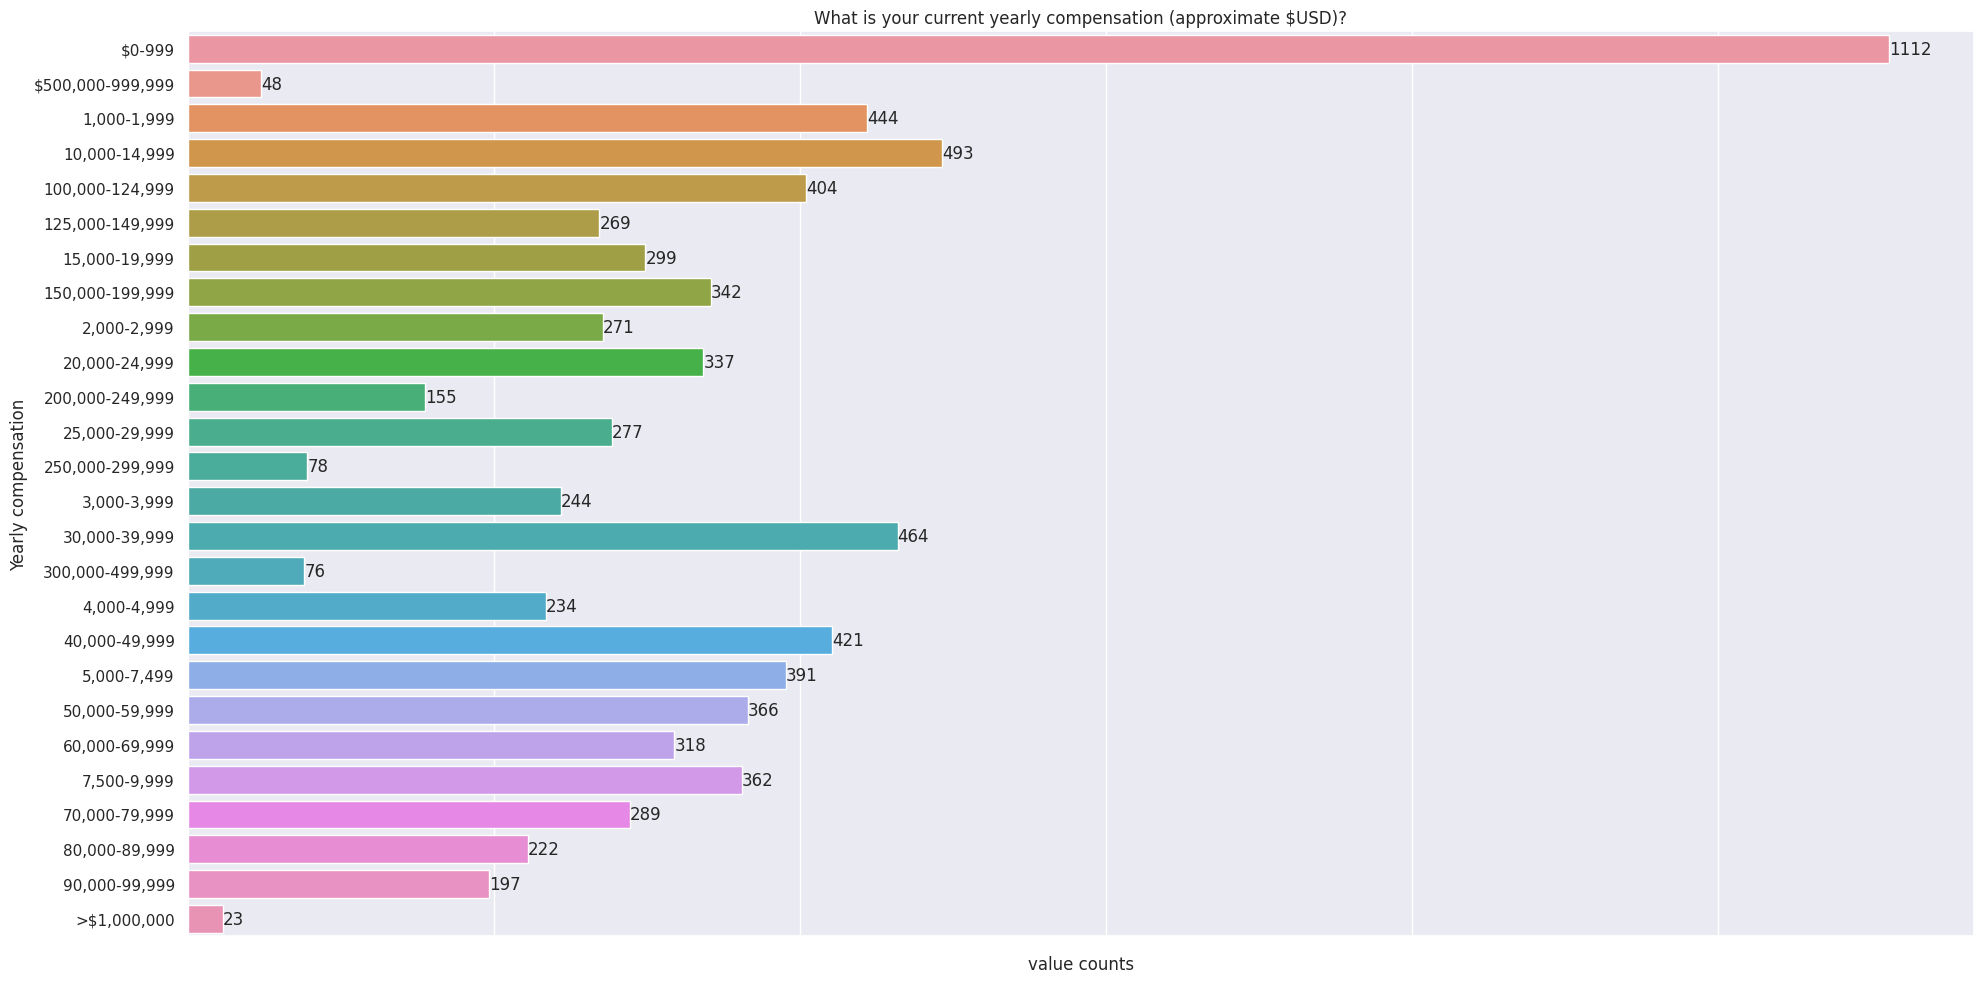

In [65]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=Q29['value counts'],y=Q29['Yearly compensation'])
ax.bar_label(ax.containers[0])
ax.set_title('What is your current yearly compensation (approximate $USD)?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q30****

In [66]:
Q30=df.iloc[:,159]
Q30=pd.DataFrame(Q30)
Q30=Q30.groupby(['Past 5 Year Experience in ML/Cloud']).size().reset_index()
Q30.columns=['Past 5 Year Experience in ML/Cloud','value counts']
Q30

Past 5 Year Experience in ML/Cloud  value counts
0                          $0 ($USD)          2822
1                             $1-$99          1449
2                    $10,000-$99,999           480
3            $100,000 or more ($USD)           186
4                          $100-$999          2078
5                       $1000-$9,999          1469

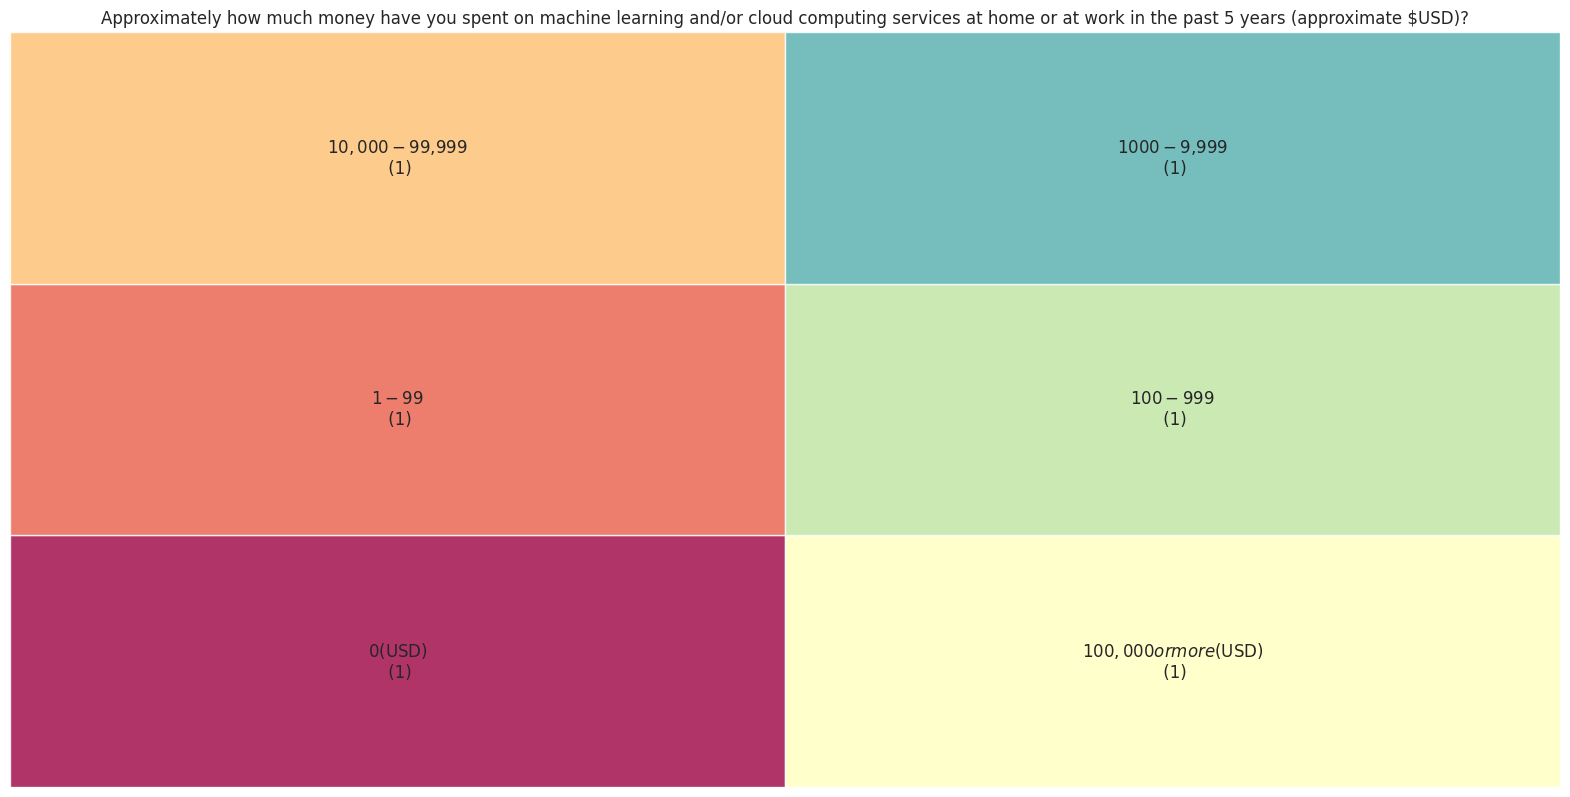

In [67]:
Q30q = Q30.groupby('Past 5 Year Experience in ML/Cloud').size().reset_index(name='counts')
Q30.columns=['Past 5 Year Experience in ML/Cloud','value counts']
labels = Q30q.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = Q30q['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

f,ax=plt.subplots(figsize=(20,10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
ax.set_title('Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?')
ax.set_xticklabels(ax.get_xticklabels())
plt.axis('off')
plt.show()

****Q31****

In [68]:
Q31_choices=df.iloc[:, 160:172]
Q31_choices

cloud-AWS Cloud-Microsoft Azure Cloud-GCP Cloud-IBM Cloud/Red Hat  \
1           NaN                   NaN       NaN                     NaN   
2           NaN                   NaN       NaN                     NaN   
3           NaN                   NaN       NaN                     NaN   
4           NaN                   NaN       NaN                     NaN   
5           NaN                   NaN       NaN                     NaN   
...         ...                   ...       ...                     ...   
23993       NaN                   NaN       NaN                     NaN   
23994       NaN                   NaN       NaN                     NaN   
23995       NaN       Microsoft Azure       NaN                     NaN   
23996       NaN                   NaN       NaN                     NaN   
23997       NaN                   NaN       NaN                     NaN   

      Cloud-Oracle Cloud-SAP Cloud-VMware Cloud-Alibaba Cloud-Tencent  \
1              NaN       NaN          NaN           NaN           NaN   
2              NaN       NaN          NaN           NaN           NaN   
3              NaN       NaN          NaN           NaN           NaN   
4              NaN       NaN          NaN           NaN           NaN   
5              NaN       NaN          NaN           NaN           NaN   
...            ...       ...          ...           ...           ...   
23993          NaN       NaN          NaN           NaN           NaN   
23994          NaN       NaN          NaN           NaN           NaN   
23995          NaN       NaN          NaN           NaN           NaN   
23996          NaN       NaN          NaN           NaN           NaN   
23997          NaN       NaN          NaN           NaN           NaN   

      Cloud- Huawei Cloud-None Cloud-Other  
1               NaN        NaN         NaN  
2               NaN        NaN         NaN  
3               NaN        NaN         NaN  
4               NaN        NaN       Other  
5               NaN        NaN         NaN  
...             ...        ...         ...  
23993           NaN        NaN         NaN  
23994           NaN        NaN         NaN  
23995           NaN        NaN         NaN  
23996           NaN        NaN         NaN  
23997           NaN        NaN         NaN  

[23997 rows x 12 columns]

In [69]:
cols,value_cnts=[],[]
for i in Q31_choices.columns:
    cols.append(Q31_choices[i].unique()[1])
    value_cnts.append(Q31_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q31_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['cloud computing platforms','value counts']
agg_data

cloud computing platforms  value counts
0     Amazon Web Services (AWS)          2346
1               Microsoft Azure          1416
2   Google Cloud Platform (GCP)          2056
3           IBM Cloud / Red Hat           287
4                  Oracle Cloud           230
5                     SAP Cloud           107
6                  VMware Cloud           155
7                 Alibaba Cloud            76
8                 Tencent Cloud            56
9                  Huawei Cloud            47
10                         None          1167
11                        Other           217

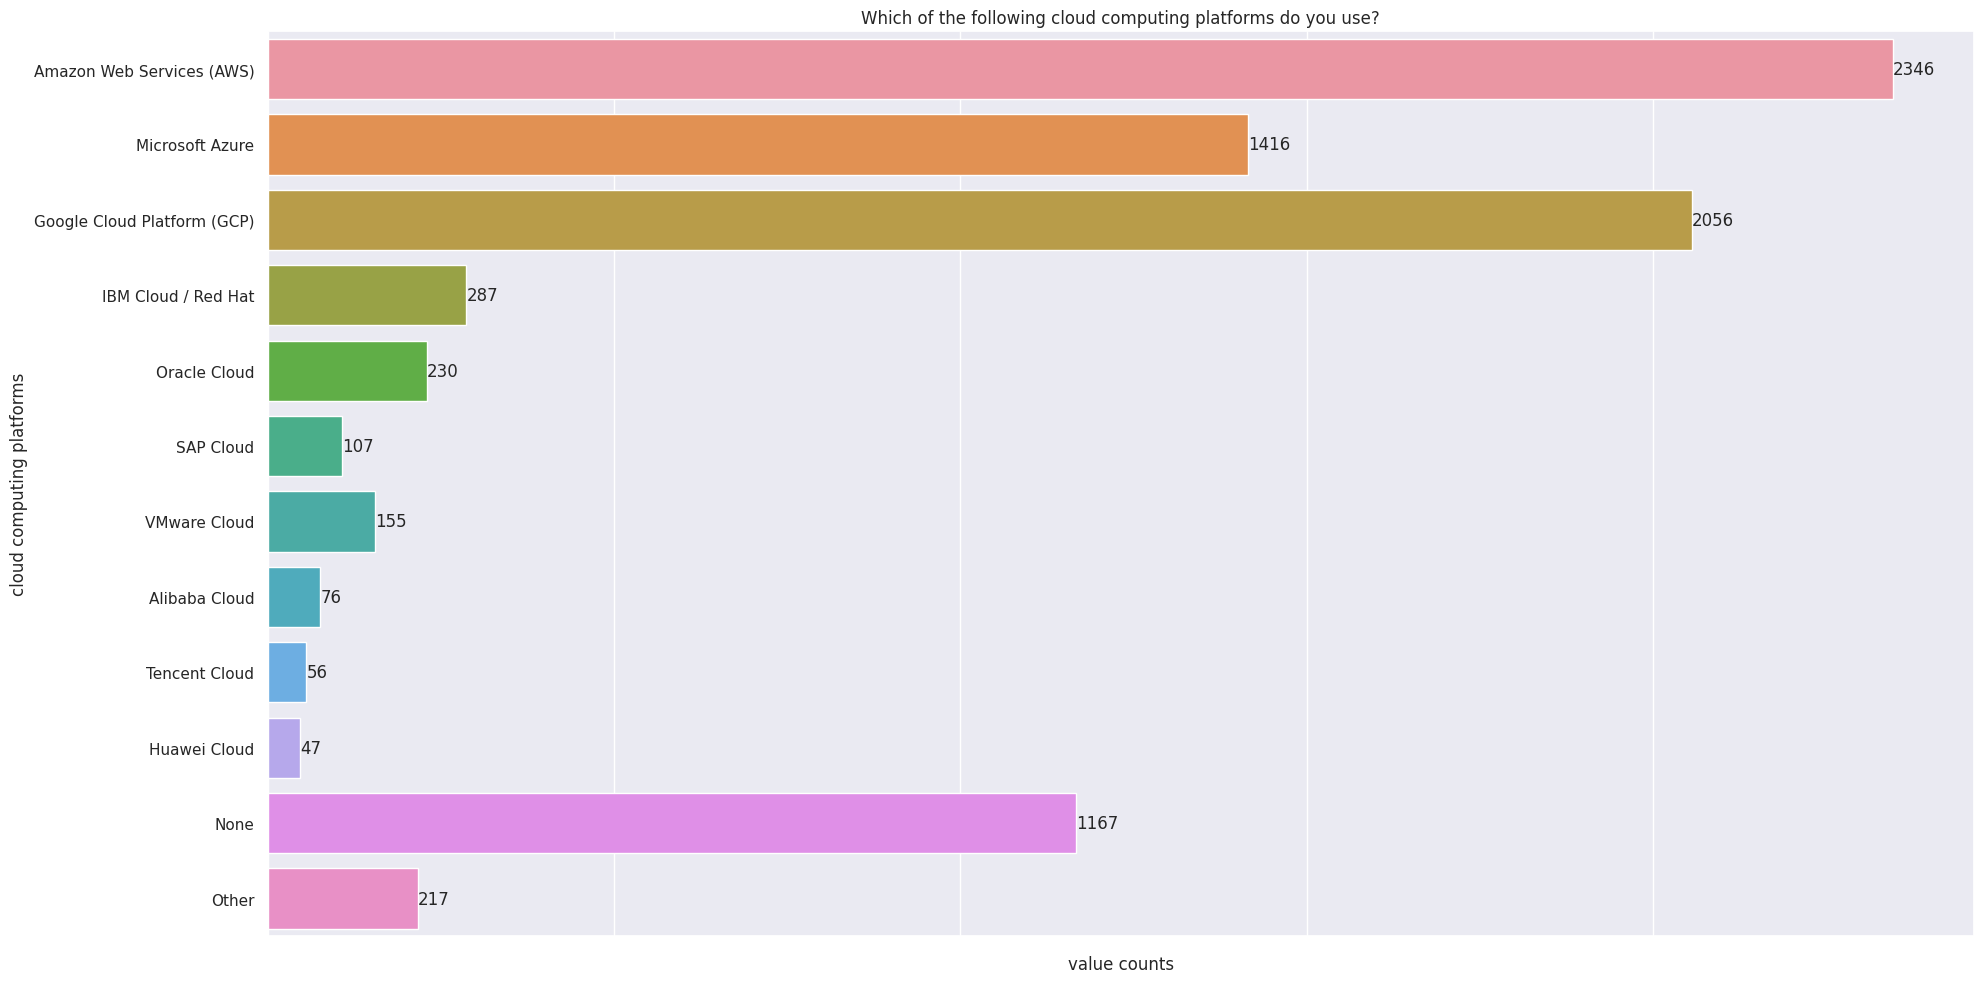

In [70]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['cloud computing platforms'])
ax.bar_label(ax.containers[0])
ax.set_title('Which of the following cloud computing platforms do you use?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q32****

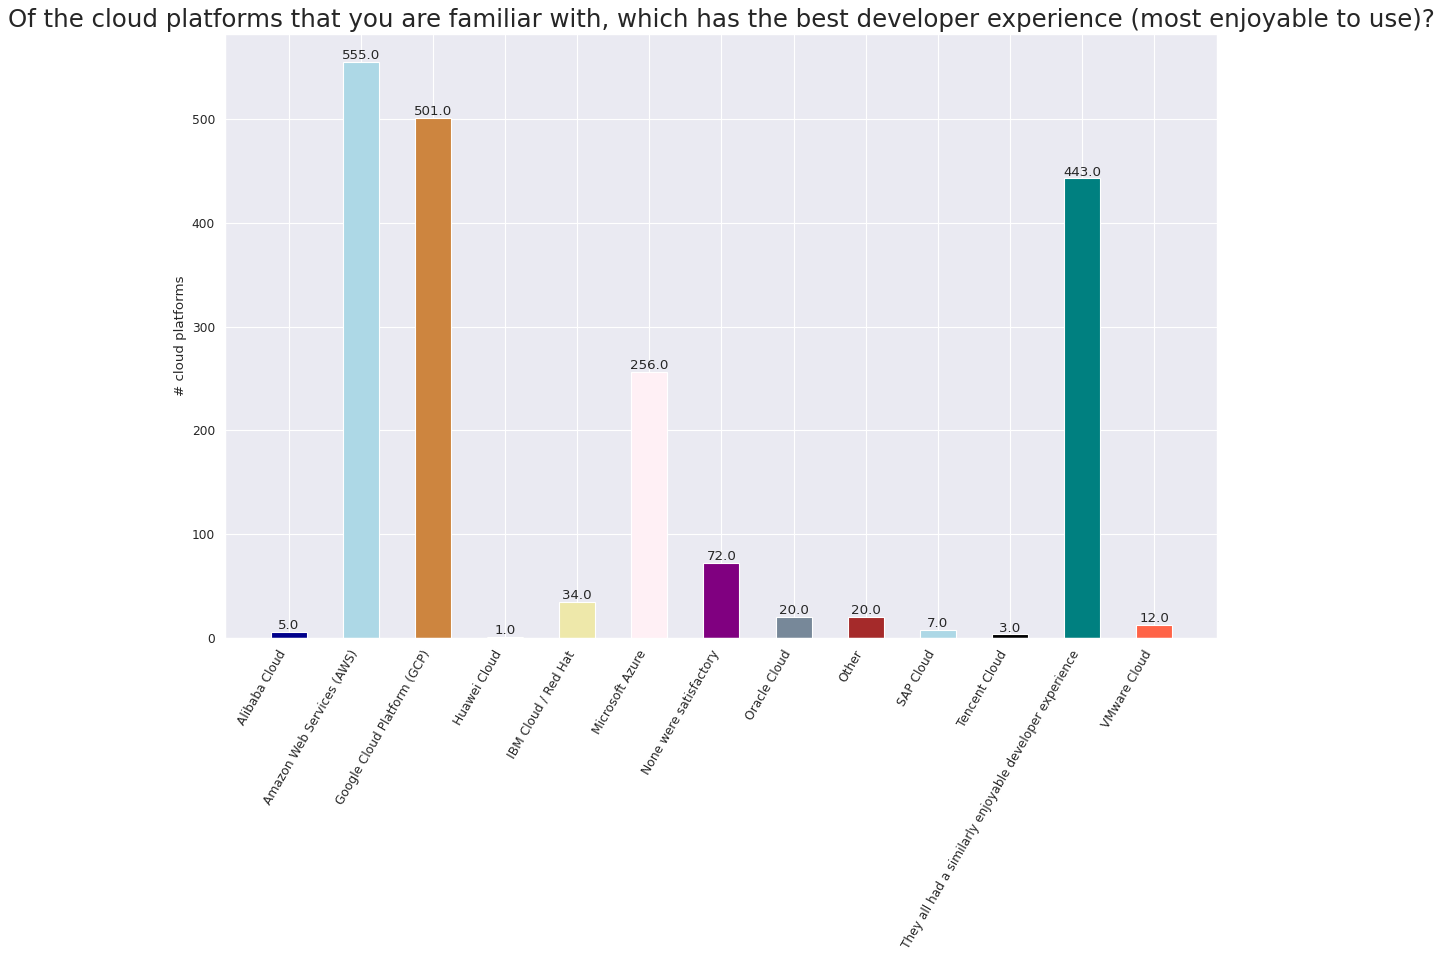

In [71]:
Q32=df.iloc[:,172]
Q32=pd.DataFrame(Q32)
Q32


Q32q = Q32.groupby('Count of familiar Cloud platform').size().reset_index(name='counts')
n = Q32q['Count of familiar Cloud platform'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(Q32q['Count of familiar Cloud platform'], Q32q['counts'], color=c, width=.5)
for i, val in enumerate(Q32q['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(Q32q['Count of familiar Cloud platform'], rotation=60, horizontalalignment= 'right')
plt.title("Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?", fontsize=22)
plt.ylabel('# cloud platforms')
plt.show()

****Q33****

In [72]:
Q33_choices=df.iloc[:, 173:178]
Q33_choices

CloudProduct-Amazon EC2 CloudProduct-Microsoft Azure VM  \
1                         NaN                             NaN   
2                         NaN                             NaN   
3                         NaN                             NaN   
4                         NaN                             NaN   
5                         NaN                             NaN   
...                       ...                             ...   
23993                     NaN                             NaN   
23994                     NaN                             NaN   
23995                     NaN                             NaN   
23996                     NaN                             NaN   
23997                     NaN                             NaN   

      CloudProduct-Google Cloud CloudProduct-None CloudProduct-Other  
1                           NaN               NaN                NaN  
2                           NaN               NaN                NaN  
3                           NaN               NaN                NaN  
4                           NaN               NaN                NaN  
5                           NaN               NaN                NaN  
...                         ...               ...                ...  
23993                       NaN               NaN                NaN  
23994                       NaN               NaN                NaN  
23995                       NaN         No / None                NaN  
23996                       NaN               NaN                NaN  
23997                       NaN               NaN                NaN  

[23997 rows x 5 columns]

In [73]:
cols,value_cnts=[],[]
for i in Q33_choices.columns:
    cols.append(Q33_choices[i].unique()[1])
    value_cnts.append(Q33_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q33_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['cloud computing products','value counts']
agg_data

cloud computing products  value counts
0  Amazon Elastic Compute Cloud (EC2)          1609
1    Microsoft Azure Virtual Machines           887
2         Google Cloud Compute Engine          1321
3                           No / None           930
4                               Other            68

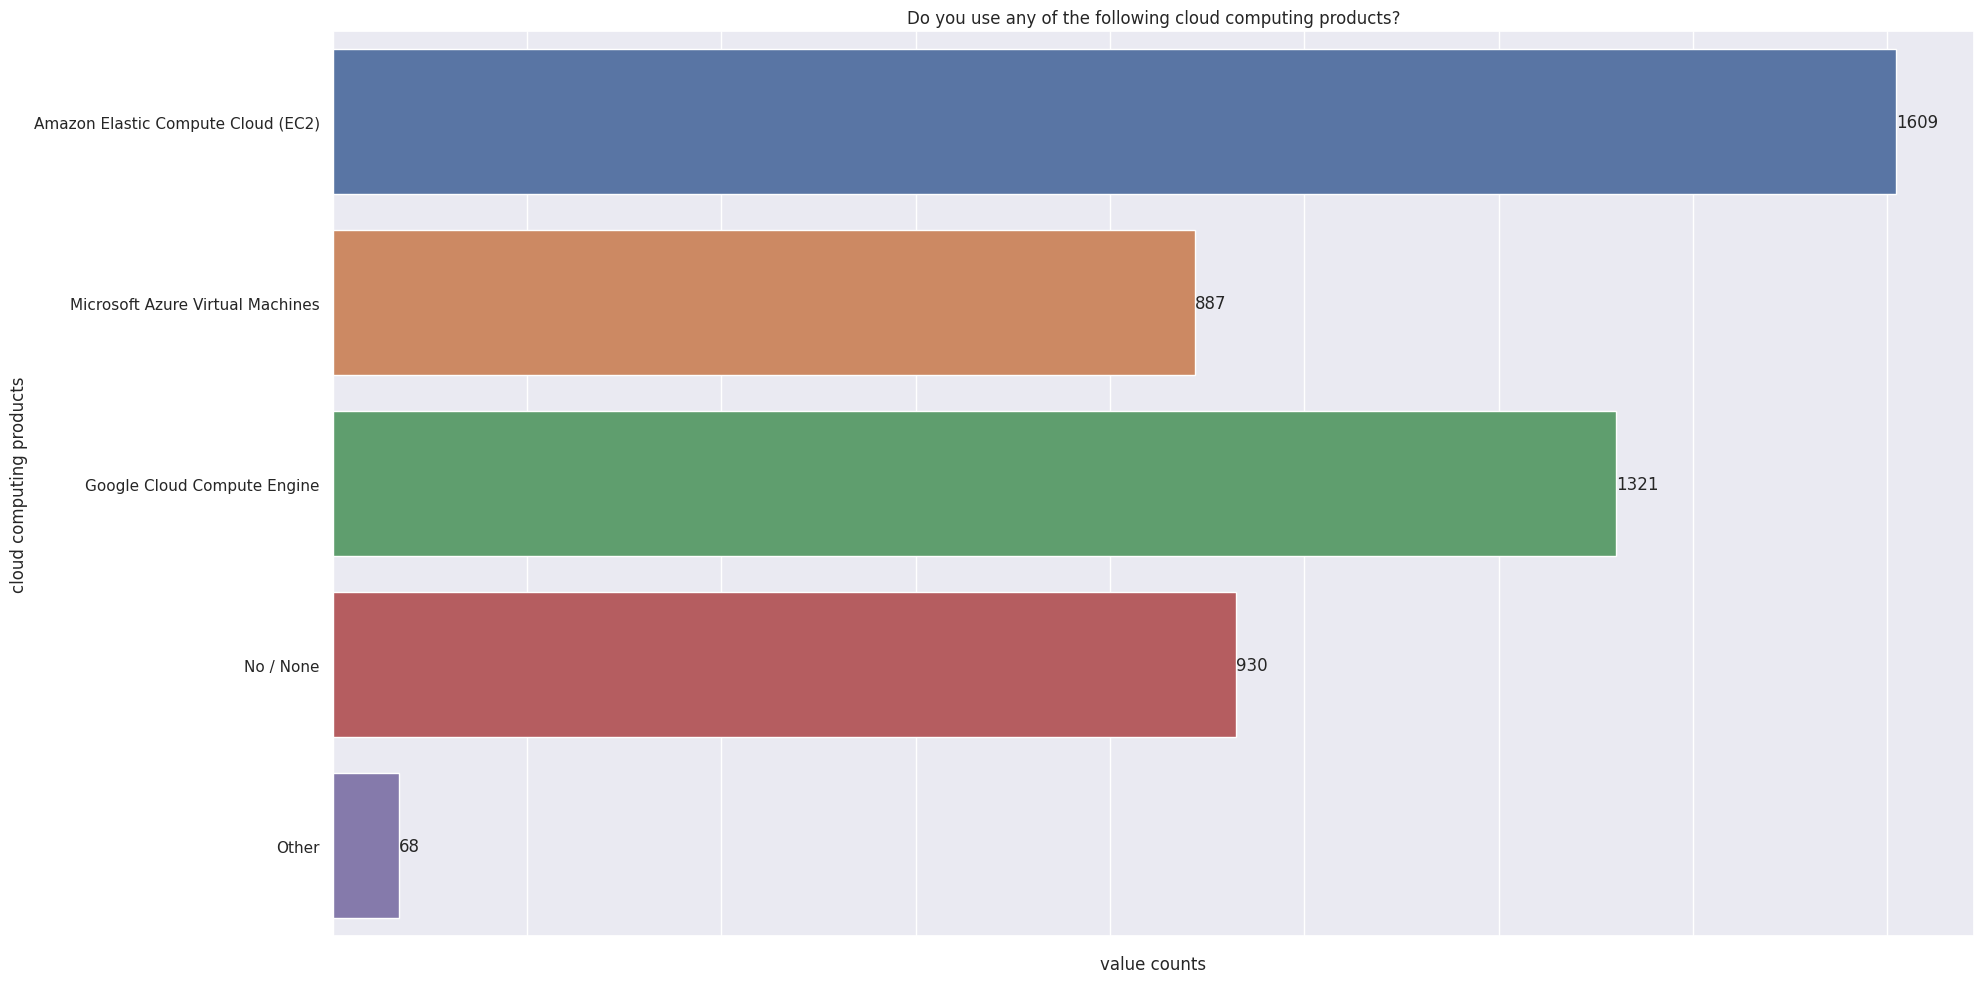

In [74]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['cloud computing products'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following cloud computing products?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q34****

In [75]:
Q34_choices=df.iloc[:, 178:186]
Q34_choices

StorageProducts-Microsoft Azure Blob Storage  \
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
5                                              NaN   
...                                            ...   
23993                                          NaN   
23994                                          NaN   
23995                                          NaN   
23996                                          NaN   
23997                                          NaN   

      StorageProducts-Microsoft Azure Files  \
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
5                                       NaN   
...                                     ...   
23993                                   NaN   
23994                                   NaN   
23995                                   NaN   
23996                                   NaN   
23997                                   NaN   

      StorageProducts-Amazon Simple Storage Service (S3)  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993                                                NaN   
23994                                                NaN   
23995                                                NaN   
23996                                                NaN   
23997                                                NaN   

      StorageProducts-Amazon Elastic File System (EFS)  \
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
5                                                  NaN   
...                                                ...   
23993                                              NaN   
23994                                              NaN   
23995                                              NaN   
23996                                              NaN   
23997                                              NaN   

      StorageProducts-Google Cloud Storage (GCS)  \
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   
...                                          ...   
23993                                        NaN   
23994                                        NaN   
23995                                        NaN   
23996                                        NaN   
23997                                        NaN   

      StorageProducts-Google Cloud Filestore StorageProducts-No/None  \
1                                        NaN                     NaN   
2                                        NaN                     NaN   
3                                        NaN                     NaN   
4                                        NaN                     NaN   
5                                        NaN                     NaN   
...                                      ...                     ...   
23993                                    NaN                     NaN   
23994                                    NaN                     NaN   
23995                                    NaN               No / None   
23996                        

In [76]:
cols,value_cnts=[],[]
for i in Q34_choices.columns:
    cols.append(Q34_choices[i].unique()[1])
    value_cnts.append(Q34_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q34_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['data storage products','value counts']
agg_data

data storage products  value counts
0        Microsoft Azure Blob Storage           615
1               Microsoft Azure Files           511
2  Amazon Simple Storage Service (S3)          1624
3    Amazon Elastic File System (EFS)           447
4          Google Cloud Storage (GCS)          1288
5              Google Cloud Filestore           481
6                           No / None           771
7                               Other            74

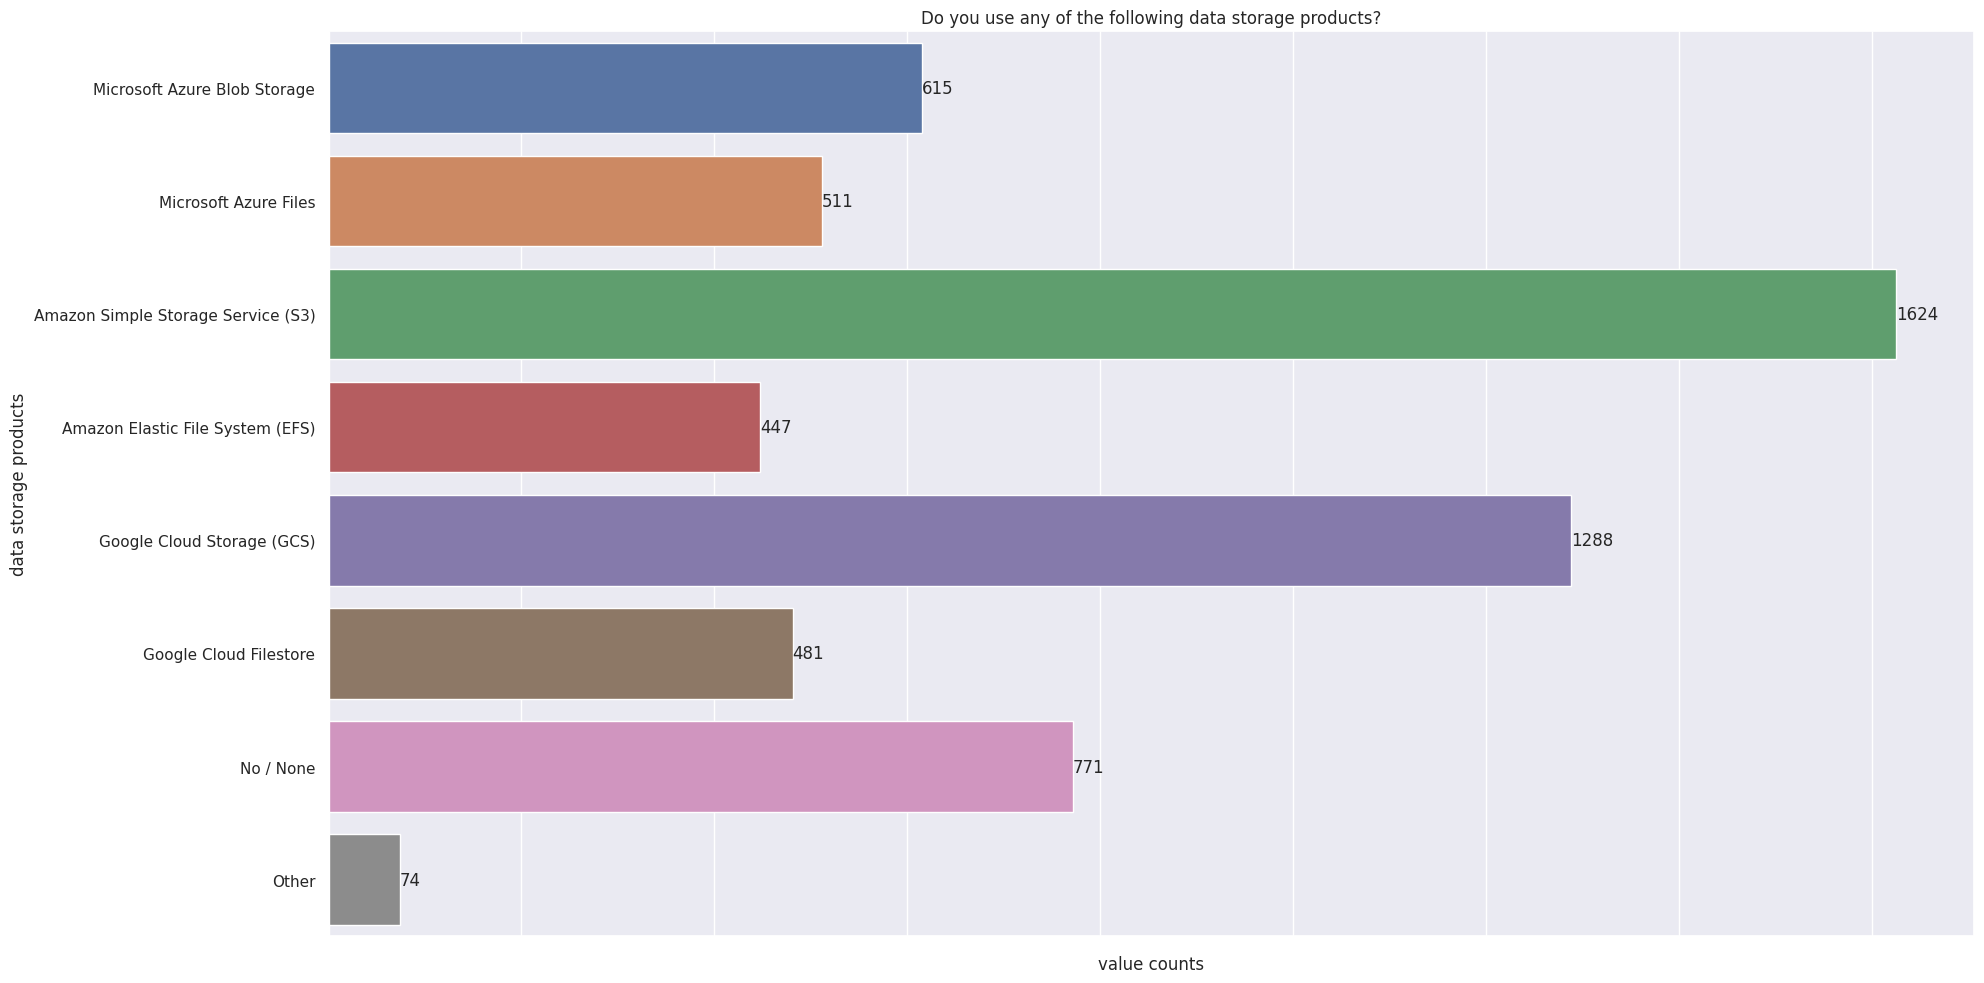

In [77]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['data storage products'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following data storage products?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q35****

In [78]:
Q35_choices=df.iloc[:, 186:202]
Q35_choices

DataProducts-MySQL DataProducts-PostgreSQL DataProducts-SQLite  \
1                    NaN                     NaN                 NaN   
2                    NaN                     NaN                 NaN   
3                    NaN                     NaN                 NaN   
4                    NaN                     NaN                 NaN   
5                    NaN                     NaN                 NaN   
...                  ...                     ...                 ...   
23993                NaN                     NaN                 NaN   
23994                NaN                     NaN                 NaN   
23995                NaN                     NaN                 NaN   
23996                NaN                     NaN                 NaN   
23997                NaN                     NaN                 NaN   

      DataProducts-Oracle Database DataProducts-MongoDB  \
1                              NaN                  NaN   
2                              NaN                  NaN   
3                              NaN                  NaN   
4                              NaN              MongoDB   
5                              NaN                  NaN   
...                            ...                  ...   
23993                          NaN                  NaN   
23994                          NaN                  NaN   
23995                          NaN                  NaN   
23996                          NaN                  NaN   
23997                          NaN                  NaN   

      DataProducts-Snowflake DataProducts-IBM Db2  \
1                        NaN                  NaN   
2                        NaN                  NaN   
3                        NaN                  NaN   
4                        NaN                  NaN   
5                        NaN                  NaN   
...                      ...                  ...   
23993                    NaN                  NaN   
23994                    NaN                  NaN   
23995                    NaN                  NaN   
23996                    NaN                  NaN   
23997                    NaN                  NaN   

      DataProducts-Microsoft SQL Server DataProducts-Microsoft Azure SQL  \
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   
5                                   NaN                              NaN   
...                                 ...                              ...   
23993                               NaN                              NaN   
23994                               NaN                              NaN   
23995                               NaN     Microsoft Azure SQL Database   
23996                               NaN                              NaN   
23997                               NaN                              NaN   

      DataProducts-Amazon Redshift DataProducts-Amazon RDS  \
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   
5                              NaN                     NaN   
...                            ...                     ...   
23993                          NaN                     NaN   
23994                          NaN                     NaN   
23995                          NaN                     NaN   
23996                          NaN                     NaN   
23997                          NaN                     NaN   

      DataProducts-Amazon DynamoDB DataProducts-Google Cloud BigQuery  \
1                              NaN                              

In [79]:
cols,value_cnts=[],[]
for i in Q35_choices.columns:
    cols.append(Q35_choices[i].unique()[1])
    value_cnts.append(Q35_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q35_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['data products','value counts']
agg_data

data products  value counts
0                          MySQL          2233
1                     PostgreSQL          1516
2                         SQLite          1159
3                Oracle Database           688
4                        MongoDB          1031
5                      Snowflake           399
6                        IBM Db2           192
7           Microsoft SQL Server          1203
8   Microsoft Azure SQL Database           520
9                Amazon Redshift           380
10                    Amazon RDS           505
11               Amazon DynamoDB           356
12         Google Cloud BigQuery           690
13              Google Cloud SQL           439
14                          None           955
15                         Other           217

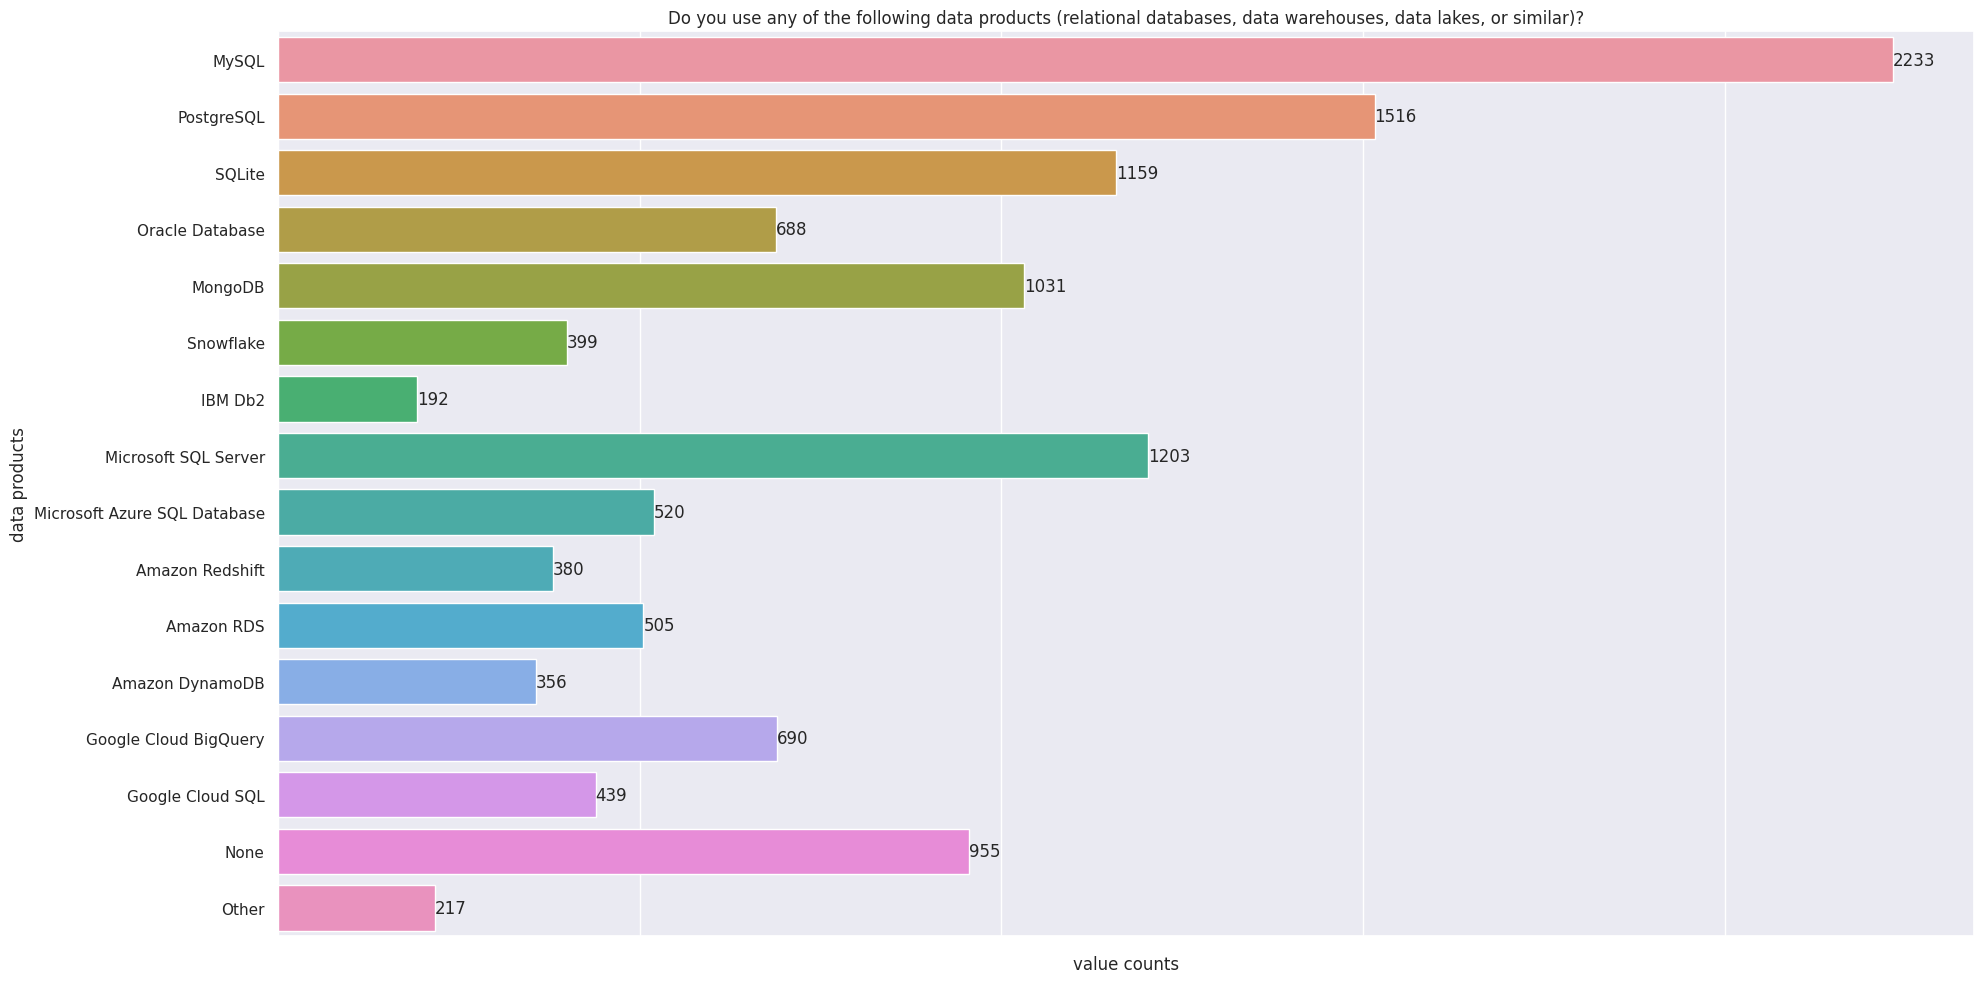

In [80]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['data products'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q36****

In [81]:
Q36_choices=df.iloc[:, 202:217]
Q36_choices

BusinessTool-Amazon QuickSight BusinessTool-Microsoft Power BI  \
1                                NaN                             NaN   
2                                NaN                             NaN   
3                                NaN                             NaN   
4                                NaN                             NaN   
5                                NaN                             NaN   
...                              ...                             ...   
23993                            NaN                             NaN   
23994                            NaN                             NaN   
23995                            NaN                             NaN   
23996                            NaN                             NaN   
23997                            NaN                             NaN   

      BusinessTool-Google Data Studio BusinessTool-Looker  \
1                                 NaN                 NaN   
2                                 NaN                 NaN   
3                                 NaN                 NaN   
4                                 NaN                 NaN   
5                                 NaN                 NaN   
...                               ...                 ...   
23993                             NaN                 NaN   
23994                             NaN                 NaN   
23995                             NaN                 NaN   
23996                             NaN                 NaN   
23997                             NaN                 NaN   

      BusinessTool-Tableau BusinessTool-Qlik Sense BusinessTool-Domo  \
1                      NaN                     NaN               NaN   
2                      NaN                     NaN               NaN   
3                      NaN                     NaN               NaN   
4                      NaN                     NaN               NaN   
5                      NaN                     NaN               NaN   
...                    ...                     ...               ...   
23993                  NaN                     NaN               NaN   
23994                  NaN                     NaN               NaN   
23995              Tableau                     NaN               NaN   
23996                  NaN                     NaN               NaN   
23997                  NaN                     NaN               NaN   

      BusinessTool-TIBCO Spotfire BusinessTool-Alteryx BusinessTool-Sisense  \
1                             NaN                  NaN                  NaN   
2                             NaN                  NaN                  NaN   
3                             NaN                  NaN                  NaN   
4                             NaN                  NaN                  NaN   
5                             NaN                  NaN                  NaN   
...                           ...                  ...                  ...   
23993                         NaN                  NaN                  NaN   
23994                         NaN                  NaN                  NaN   
23995                         NaN                  NaN                  NaN   
23996                         NaN                  NaN                  NaN   
23997                         NaN                  NaN                  NaN   

      BusinessTool-SAP Analytics Cloud BusinessTool-Microsoft Azure Synapse  \
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   
5                                  NaN                                  NaN   
...                                ...                                  ...   
23993                              NaN   

In [82]:
cols,value_cnts=[],[]
for i in Q36_choices.columns:
    cols.append(Q36_choices[i].unique()[1])
    value_cnts.append(Q36_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q36_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['business intelligence tools','value counts']
agg_data

business intelligence tools  value counts
0            Amazon QuickSight           224
1           Microsoft Power BI          1658
2           Google Data Studio           643
3                       Looker           166
4                      Tableau          1732
5                   Qlik Sense           207
6                         Domo            44
7               TIBCO Spotfire            86
8                      Alteryx           132
9                      Sisense            38
10         SAP Analytics Cloud           106
11     Microsoft Azure Synapse           167
12                 Thoughtspot            22
13                        None          2050
14                       Other           191

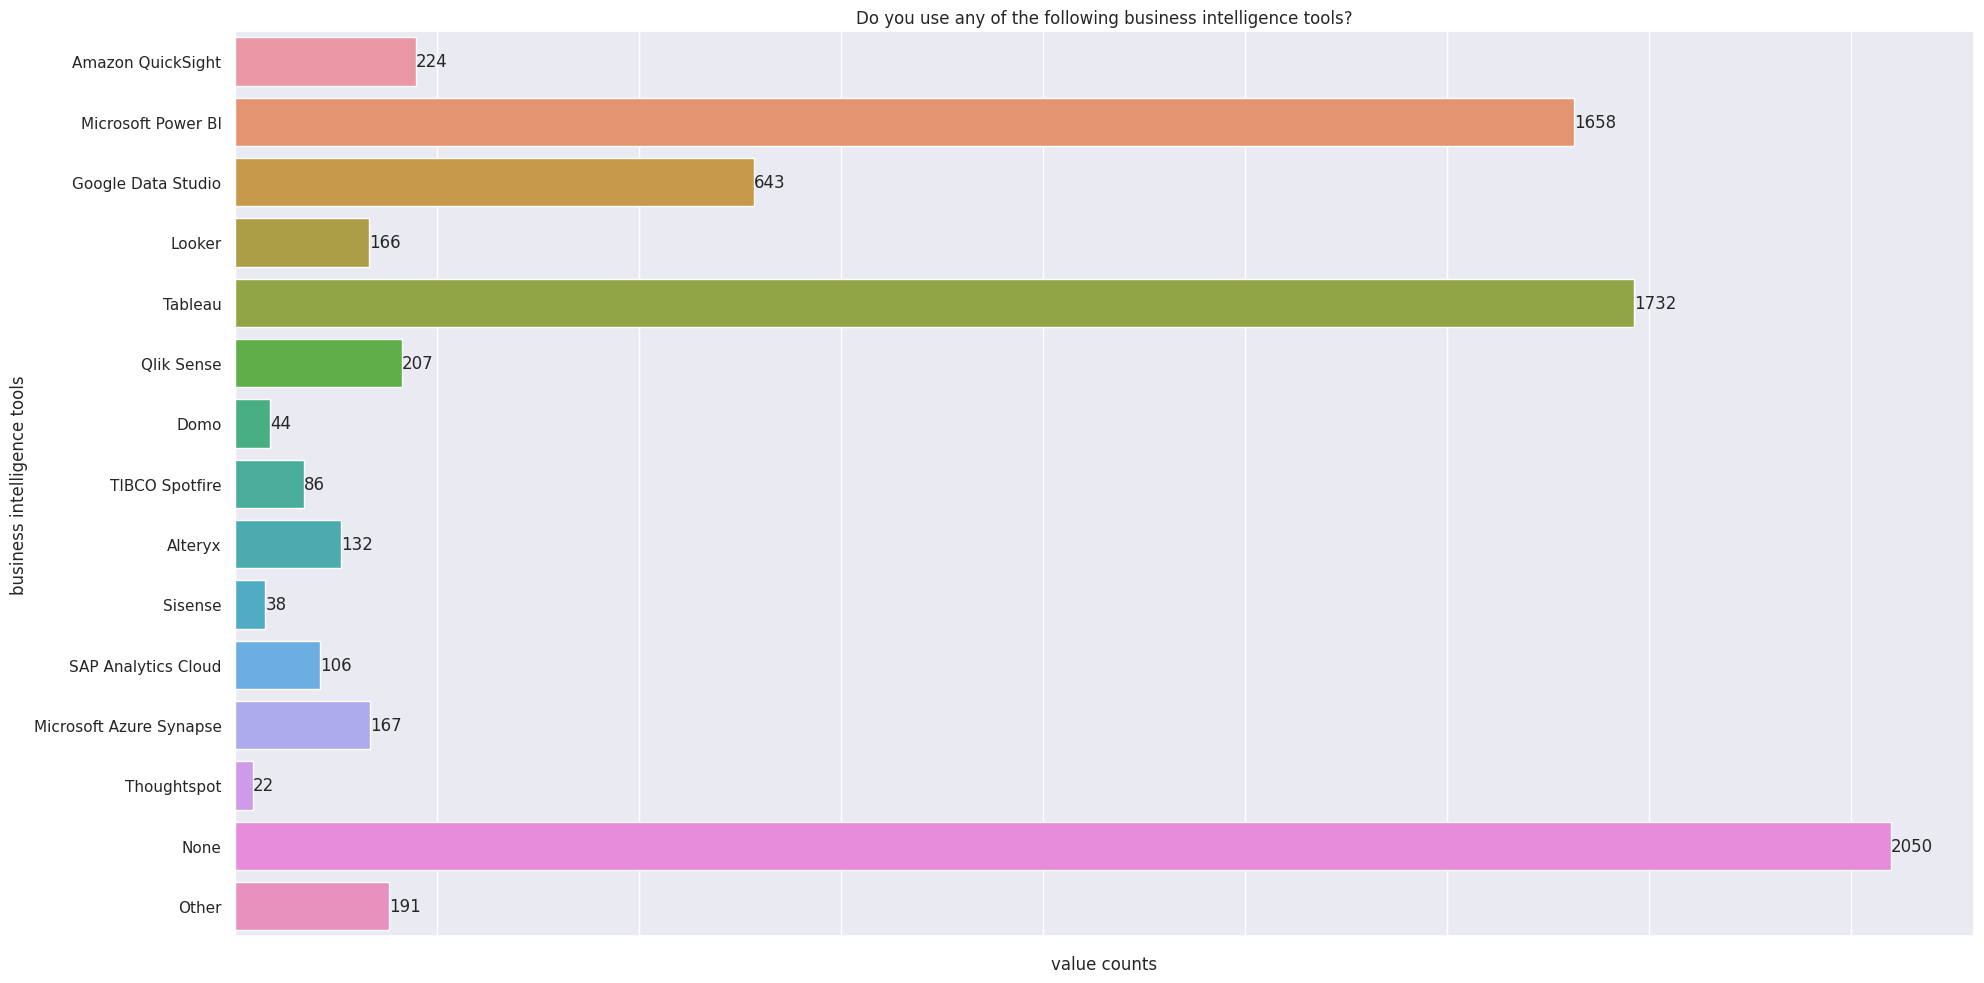

In [83]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['business intelligence tools'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following business intelligence tools?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q37****

In [84]:
Q37_choices=df.iloc[:, 217:230]
Q37_choices

MLProducts-Amazon SageMaker MLProducts-Azure Machine Learning Studio  \
1                             NaN                                      NaN   
2                             NaN                                      NaN   
3                             NaN                                      NaN   
4                             NaN                                      NaN   
5                             NaN                                      NaN   
...                           ...                                      ...   
23993                         NaN                                      NaN   
23994                         NaN                                      NaN   
23995                         NaN                                      NaN   
23996                         NaN                                      NaN   
23997                         NaN                                      NaN   

      MLProducts-Google Cloud Vertex AI MLProducts-DataRobot  \
1                                   NaN                  NaN   
2                                   NaN                  NaN   
3                                   NaN                  NaN   
4                                   NaN                  NaN   
5                                   NaN                  NaN   
...                                 ...                  ...   
23993                               NaN                  NaN   
23994                               NaN                  NaN   
23995                               NaN                  NaN   
23996                               NaN                  NaN   
23997                               NaN                  NaN   

      MLProducts-Databricks MLProducts-Dataiku MLProducts-Alteryx  \
1                       NaN                NaN                NaN   
2                       NaN                NaN                NaN   
3                       NaN                NaN                NaN   
4                       NaN                NaN                NaN   
5                       NaN                NaN                NaN   
...                     ...                ...                ...   
23993                   NaN                NaN                NaN   
23994                   NaN                NaN                NaN   
23995                   NaN                NaN                NaN   
23996                   NaN                NaN                NaN   
23997                   NaN                NaN                NaN   

      MLProducts-Rapidminer MLProducts-C3.ai MLProducts-Domino Data Lab  \
1                       NaN              NaN                        NaN   
2                       NaN              NaN                        NaN   
3                       NaN              NaN                        NaN   
4                       NaN              NaN                        NaN   
5                       NaN              NaN                        NaN   
...                     ...              ...                        ...   
23993                   NaN              NaN                        NaN   
23994                   NaN              NaN                        NaN   
23995                   NaN              NaN                        NaN   
23996                   NaN              NaN                        NaN   
23997                   NaN              NaN                        NaN   

      MLProducts-H2O AI Cloud MLProducts-No / None MLProducts-Other  
1                         NaN                  NaN              NaN  
2                         NaN                  NaN              NaN  
3                         NaN                  NaN              NaN  
4                         NaN            No / None              NaN  
5                         NaN                  NaN              NaN  
...                       ...                  ...              ...  
23993                     NaN                  NaN              NaN  
23994     

In [85]:
cols,value_cnts=[],[]
for i in Q37_choices.columns:
    cols.append(Q37_choices[i].unique()[1])
    value_cnts.append(Q37_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q37_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['managed machine learning products','value counts']
agg_data

managed machine learning products  value counts
0                   Amazon SageMaker           561
1      Azure Machine Learning Studio           396
2             Google Cloud Vertex AI           350
3                          DataRobot           123
4                         Databricks           448
5                            Dataiku           104
6                            Alteryx            99
7                         Rapidminer           113
8                              C3.ai            30
9                    Domino Data Lab            52
10                      H2O AI Cloud           114
11                         No / None          3016
12                             Other           121

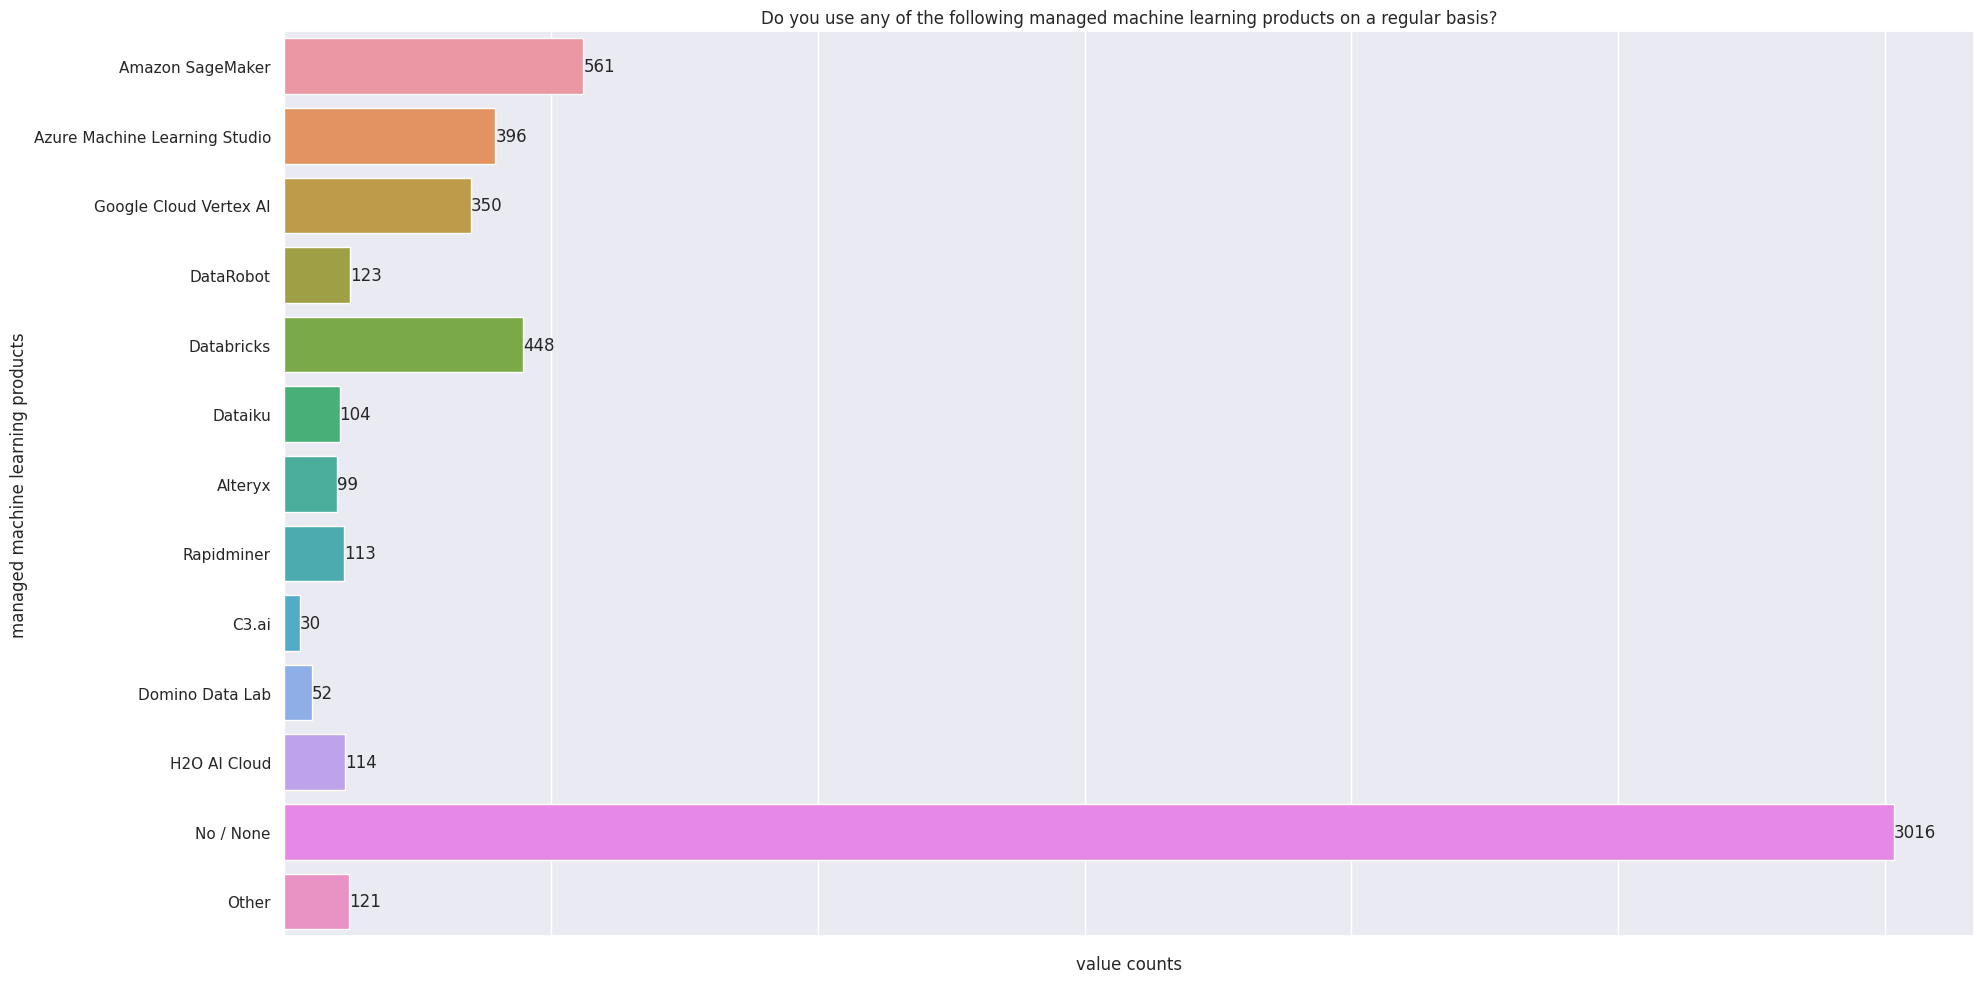

In [86]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['managed machine learning products'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following managed machine learning products on a regular basis?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q38****

In [87]:
Q38_choices=df.iloc[:, 230:238]
Q38_choices

Automated_ML_Tools-automated machine learning tools  \
1                                                    NaN    
2                                                    NaN    
3                                                    NaN    
4                                                    NaN    
5                                                    NaN    
...                                                  ...    
23993                                                NaN    
23994                                                NaN    
23995                                                NaN    
23996                                                NaN    
23997                                                NaN    

      Automated_ML_Tools-H2O Driverless AI  \
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   
...                                    ...   
23993                                  NaN   
23994                                  NaN   
23995                                  NaN   
23996                                  NaN   
23997                                  NaN   

      Automated_ML_Tools-Databricks AutoML  \
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   
...                                    ...   
23993                                  NaN   
23994                                  NaN   
23995                                  NaN   
23996                                  NaN   
23997                                  NaN   

      Automated_ML_Tools-DataRobot AutoML  \
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     NaN   
...                                   ...   
23993                                 NaN   
23994                                 NaN   
23995                                 NaN   
23996                                 NaN   
23997                                 NaN   

      Automated_ML_Tools-Amazon Sagemaker Autopilot  \
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
5                                               NaN   
...                                             ...   
23993                                           NaN   
23994                                           NaN   
23995                                           NaN   
23996                                           NaN   
23997                                           NaN   

      Automated_ML_Tools-Azure Automated Machine Learning  \
1                                                    NaN    
2                                                    NaN    
3                                                    NaN    
4                                                    NaN    
5                                                    NaN    
...                                                  ...    
23993                                                NaN    
23994                                                NaN    
23995                                                NaN    
23996                                                NaN    
23997                                                NaN    

      Automated_ML_Tools-No / None Automated_ML_Tools-Other  
1                              NaN                      NaN  
2                              NaN                      NaN  
3                              NaN            

In [88]:
cols,value_cnts=[],[]
for i in Q38_choices.columns:
    cols.append(Q38_choices[i].unique()[1])
    value_cnts.append(Q38_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q38_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['automated machine learning tools','value counts']
agg_data

automated machine learning tools  value counts
0               Google Cloud AutoML           463
1                 H2O Driverless AI           122
2                 Databricks AutoML           193
3                  DataRobot AutoML           125
4        Amazon Sagemaker Autopilot           261
5  Azure Automated Machine Learning           323
6                         No / None          3536
7                             Other           127

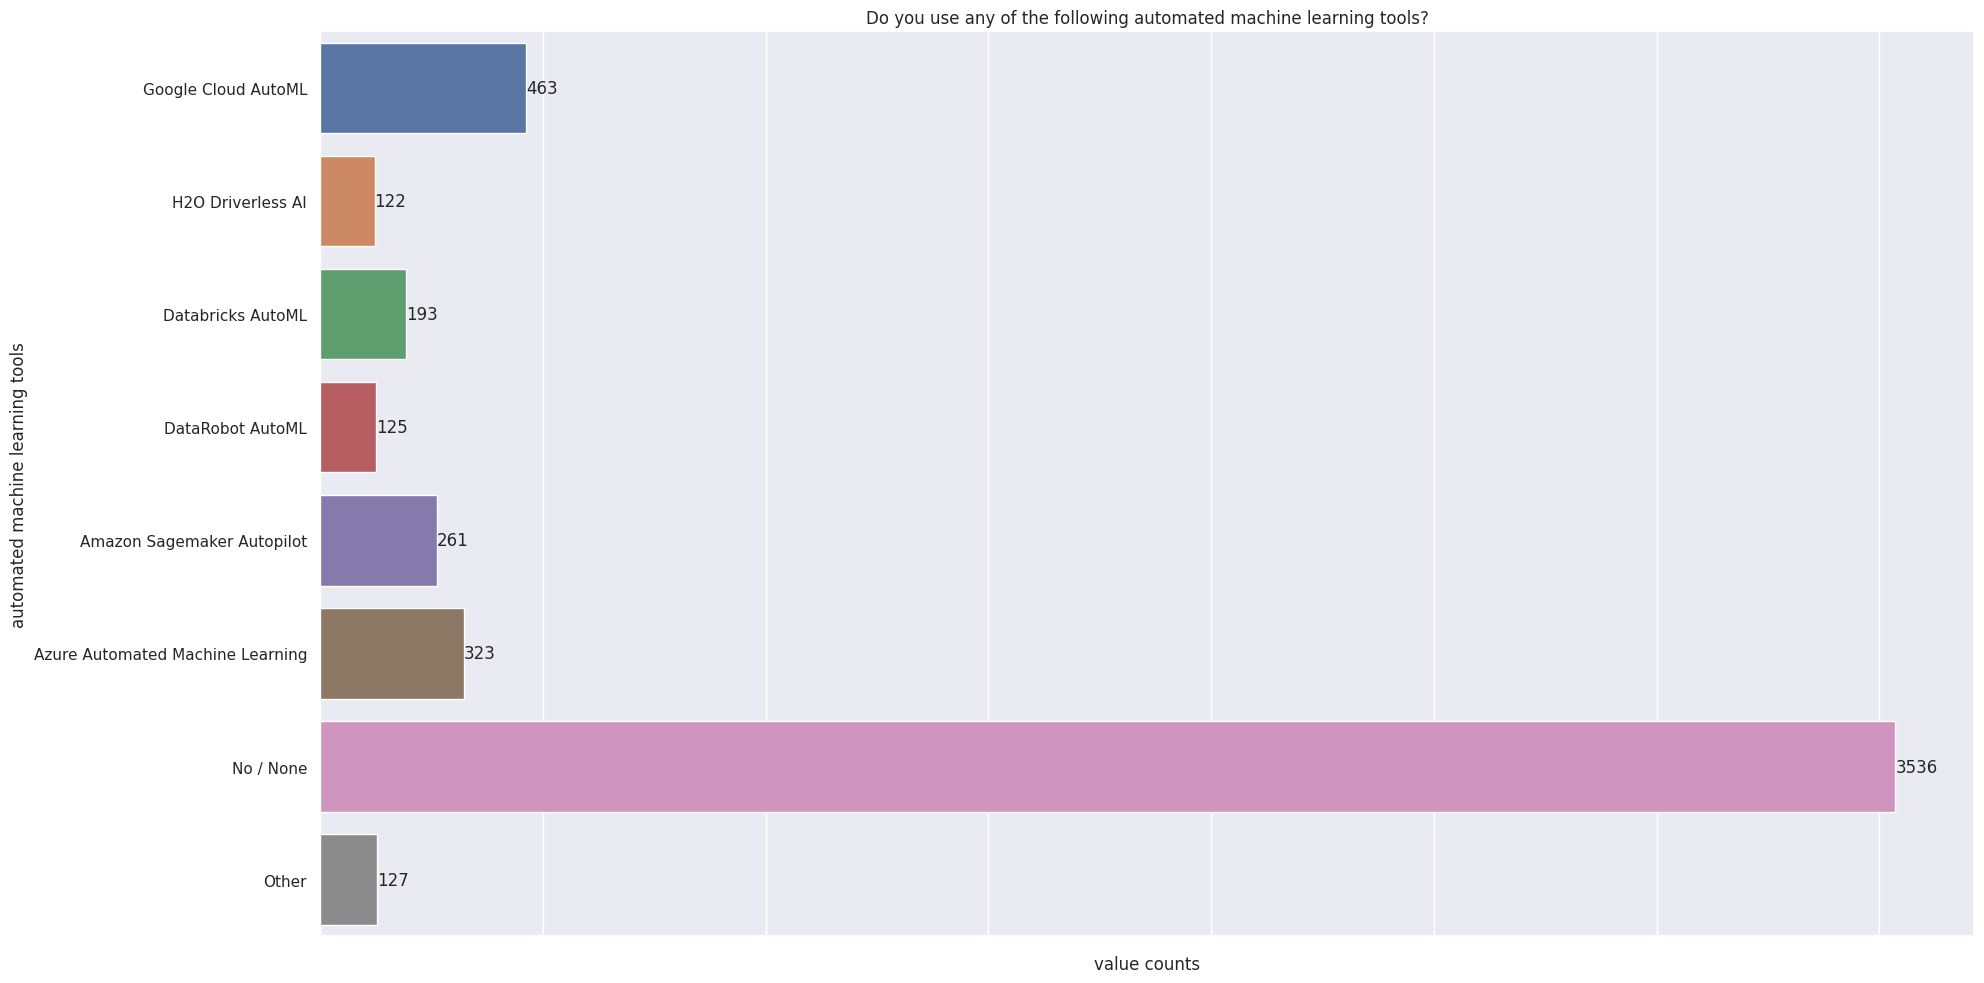

In [89]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['automated machine learning tools'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following automated machine learning tools?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q39****

In [90]:
Q39_choices=df.iloc[:, 238:250]
Q39_choices

ML_models-TensorFlow Extended (TFX) ML_models-TorchServe  \
1                                     NaN                  NaN   
2                                     NaN                  NaN   
3                                     NaN                  NaN   
4                                     NaN                  NaN   
5                                     NaN                  NaN   
...                                   ...                  ...   
23993                                 NaN                  NaN   
23994                                 NaN                  NaN   
23995                                 NaN                  NaN   
23996                                 NaN                  NaN   
23997                                 NaN                  NaN   

      ML_models-ONNX Runtime ML_models-Triton Inference Server  \
1                        NaN                               NaN   
2                        NaN                               NaN   
3                        NaN                               NaN   
4               ONNX Runtime                               NaN   
5                        NaN                               NaN   
...                      ...                               ...   
23993                    NaN                               NaN   
23994                    NaN                               NaN   
23995                    NaN                               NaN   
23996                    NaN                               NaN   
23997                    NaN                               NaN   

      ML_models-OpenVINO Model Server ML_models-KServe ML_models-BentoML  \
1                                 NaN              NaN               NaN   
2                                 NaN              NaN               NaN   
3                                 NaN              NaN               NaN   
4                                 NaN              NaN               NaN   
5                                 NaN              NaN               NaN   
...                               ...              ...               ...   
23993                             NaN              NaN               NaN   
23994                             NaN              NaN               NaN   
23995                             NaN              NaN               NaN   
23996                             NaN              NaN               NaN   
23997                             NaN              NaN               NaN   

      ML_models-Multi Model Server (MMS) ML_models-Seldon Core  \
1                                    NaN                   NaN   
2                                    NaN                   NaN   
3                                    NaN                   NaN   
4                                    NaN                   NaN   
5                                    NaN                   NaN   
...                                  ...                   ...   
23993                                NaN                   NaN   
23994                                NaN                   NaN   
23995                                NaN                   NaN   
23996                                NaN                   NaN   
23997                                NaN                   NaN   

      ML_models-MLflow ML_models-None ML_models-Other  
1                  NaN            NaN             NaN  
2                  NaN            NaN             NaN  
3                  NaN            NaN             NaN  
4                  NaN            NaN             NaN  
5                  NaN            NaN             NaN  
...                ...            ...             ...  
23993              NaN            NaN             NaN  
23994              NaN            NaN             NaN  
23995              NaN           None             NaN  
23996              NaN            NaN             NaN  
23997              NaN            NaN             NaN  

[23997 rows x 12 columns]

In [91]:
cols,value_cnts=[],[]
for i in Q39_choices.columns:
    cols.append(Q39_choices[i].unique()[1])
    value_cnts.append(Q39_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q39_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['machine learning models','value counts']
agg_data

machine learning models  value counts
0   TensorFlow Extended (TFX)           522
1                  TorchServe           167
2                ONNX Runtime           224
3     Triton Inference Server            70
4       OpenVINO Model Server            93
5                      KServe            63
6                     BentoML            53
7    Multi Model Server (MMS)            62
8                 Seldon Core            47
9                      MLflow           621
10                       None          3320
11                      Other           129

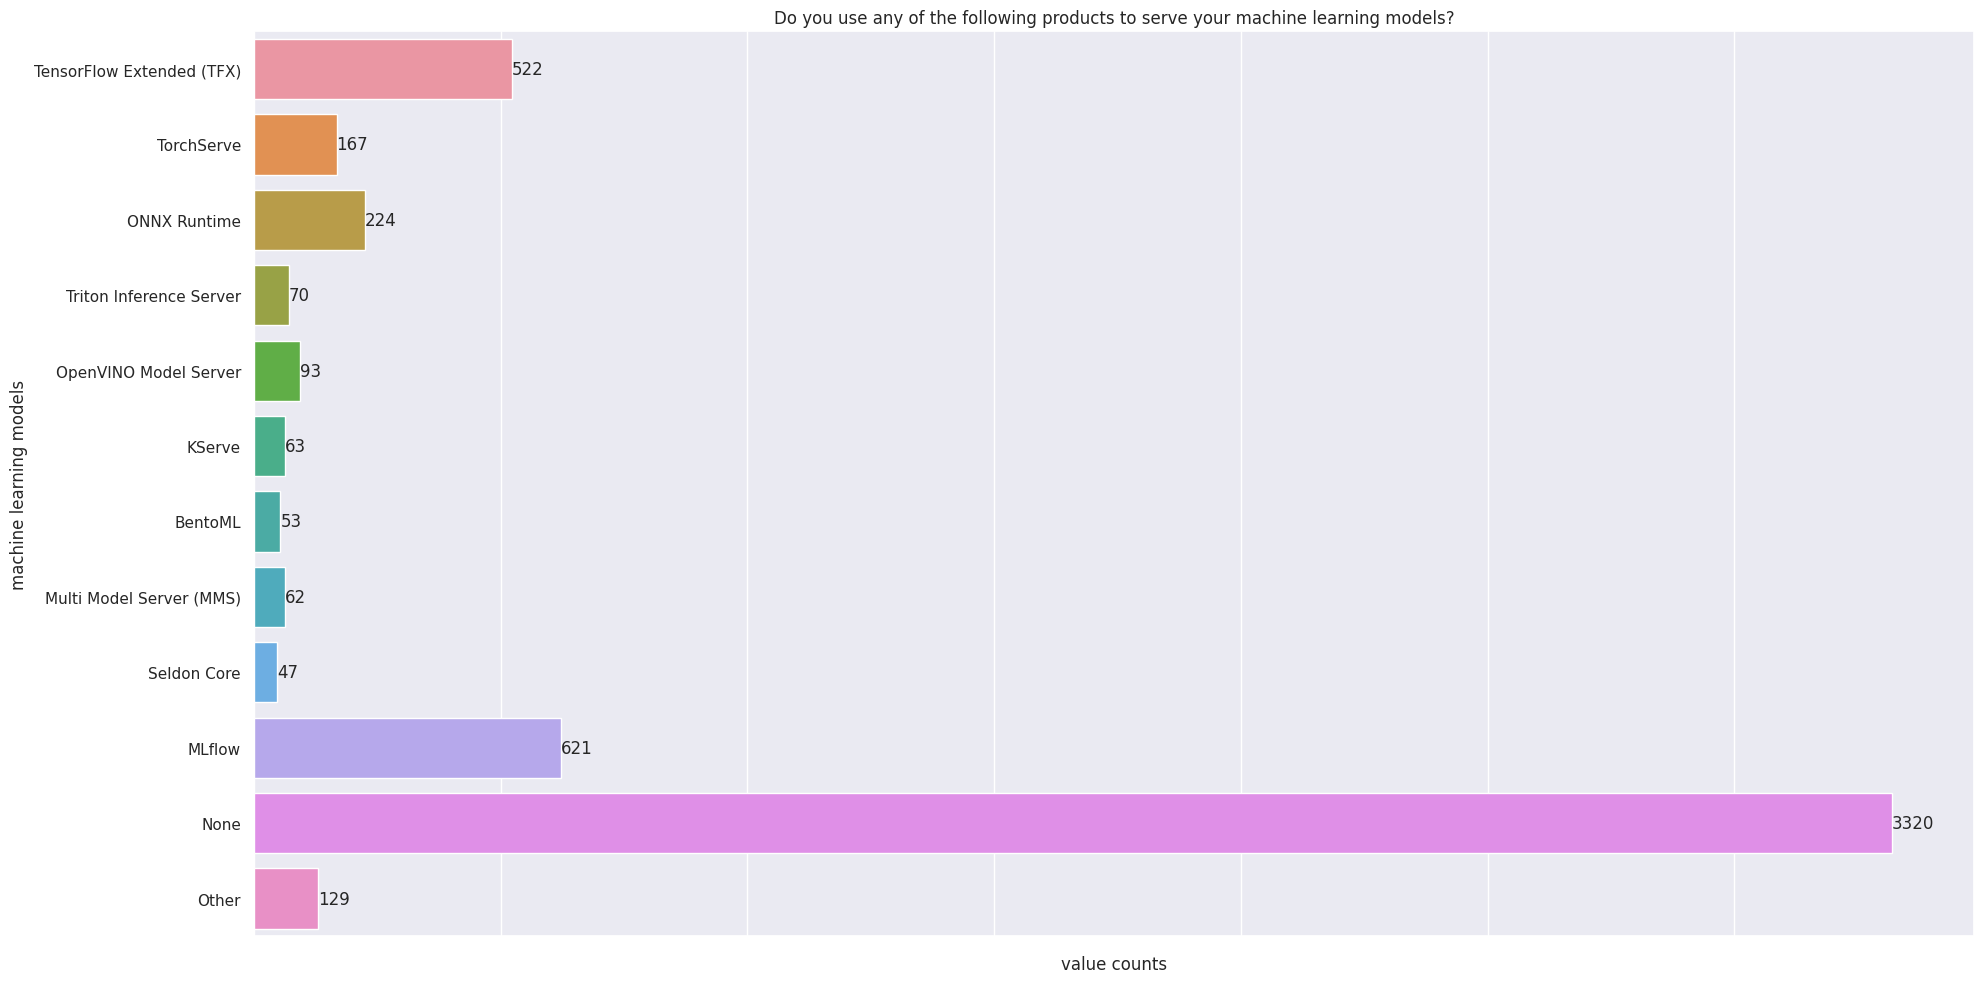

In [92]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['machine learning models'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following products to serve your machine learning models?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q40****

In [93]:
Q40_choices=df.iloc[:, 250:265]
Q40_choices

MonitoringTool-Neptune.ai MonitoringTool-Weights & Biases  \
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN                             NaN   
4                           NaN                Weights & Biases   
5                           NaN                             NaN   
...                         ...                             ...   
23993                       NaN                             NaN   
23994                       NaN                             NaN   
23995                       NaN                             NaN   
23996                       NaN                             NaN   
23997                       NaN                             NaN   

      MonitoringTool-Comet.ml MonitoringTool-TensorBoard  \
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                TensorBoard   
5                         NaN                        NaN   
...                       ...                        ...   
23993                     NaN                        NaN   
23994                     NaN                        NaN   
23995                     NaN                        NaN   
23996                     NaN                        NaN   
23997                     NaN                        NaN   

      MonitoringTool-Guild.ai MonitoringTool-ClearML MonitoringTool-Mlflow  \
1                         NaN                    NaN                   NaN   
2                         NaN                    NaN                   NaN   
3                         NaN                    NaN                   NaN   
4                         NaN                    NaN                   NaN   
5                         NaN                    NaN                   NaN   
...                       ...                    ...                   ...   
23993                     NaN                    NaN                   NaN   
23994                     NaN                    NaN                   NaN   
23995                     NaN                    NaN                   NaN   
23996                     NaN                    NaN                   NaN   
23997                     NaN                    NaN                   NaN   

      MonitoringTool-Aporia MonitoringTool-Evidently AI MonitoringTool-Arize  \
1                       NaN                         NaN                  NaN   
2                       NaN                         NaN                  NaN   
3                       NaN                         NaN                  NaN   
4                       NaN                         NaN                  NaN   
5                       NaN                         NaN                  NaN   
...                     ...                         ...                  ...   
23993                   NaN                         NaN                  NaN   
23994                   NaN                         NaN                  NaN   
23995                   NaN                         NaN                  NaN   
23996                   NaN                         NaN                  NaN   
23997                   NaN                         NaN                  NaN   

      MonitoringTool-WhyLabs MonitoringTool-Fiddler MonitoringTool-DVC  \
1                        NaN                    NaN                NaN   
2                        NaN                    NaN                NaN   
3                        NaN                    NaN                NaN   
4                        NaN                    NaN                NaN   
5                        NaN                    NaN                NaN   
...                      ...                    ...                ...   
23993                    NaN                    NaN             

In [94]:
cols,value_cnts=[],[]
for i in Q40_choices.columns:
    cols.append(Q40_choices[i].unique()[1])
    value_cnts.append(Q40_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q40_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['tools to help monitor your machine learning models','value counts']
agg_data

tools to help monitor your machine learning models  value counts
0                                          Neptune.ai           128
1                                    Weights & Biases           381
2                                            Comet.ml            56
3                                         TensorBoard           855
4                                            Guild.ai            35
5                                             ClearML            73
6                                              MLflow           659
7                                              Aporia            24
8                                        Evidently AI            52
9                                               Arize            39
10                                            WhyLabs            32
11                                            Fiddler            65
12                                                DVC           143
13                                          No / None          2930
14                                              Other           124

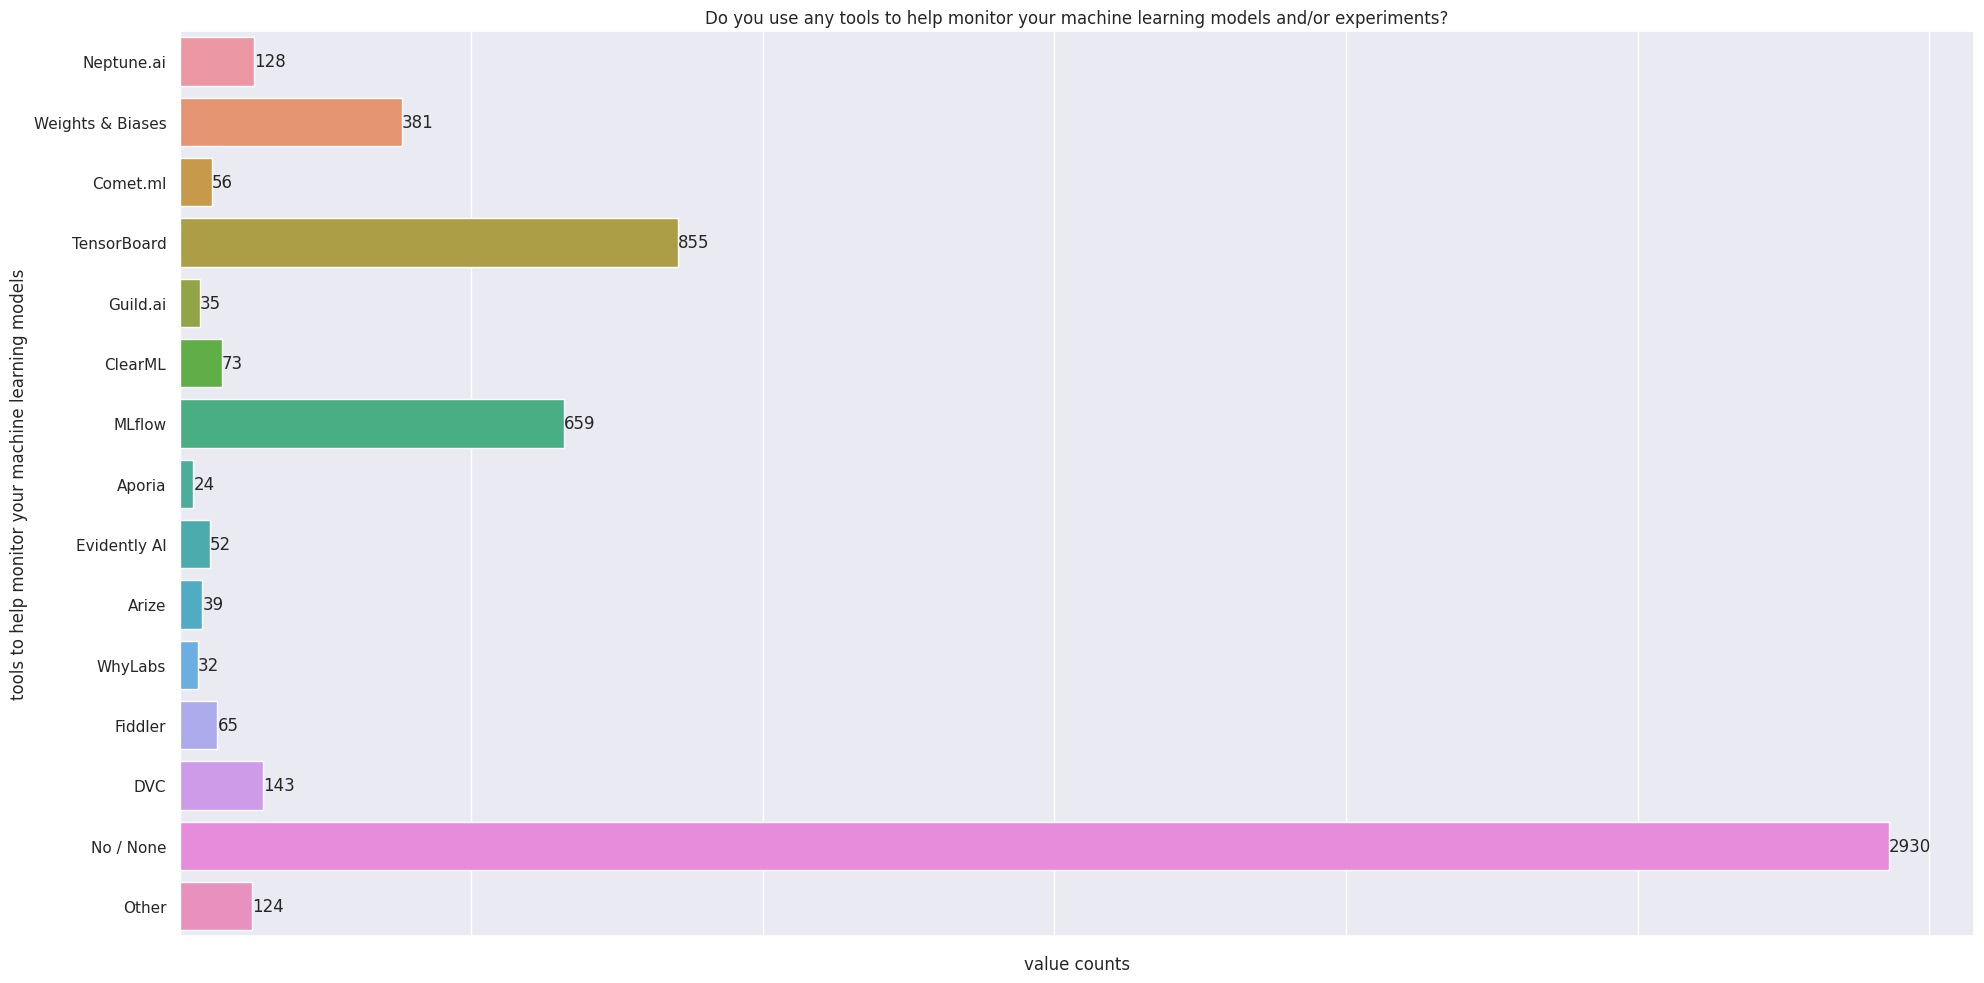

In [95]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['tools to help monitor your machine learning models'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any tools to help monitor your machine learning models and/or experiments?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q41****

In [96]:
Q41_choices=df.iloc[:, 265:274]
Q41_choices

AI products-Google Responsible AI Toolkit  \
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
...                                         ...   
23993                                       NaN   
23994                                       NaN   
23995                                       NaN   
23996                                       NaN   
23997                                       NaN   

      AI products-Microsoft Responsible AI Resources  \
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
...                                              ...   
23993                                            NaN   
23994                                            NaN   
23995                                            NaN   
23996                                            NaN   
23997                                            NaN   

      AI products-IBM AI Ethics tools AI products-Amazon AI Ethics Tools  \
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   
5                                 NaN                                NaN   
...                               ...                                ...   
23993                             NaN                                NaN   
23994                             NaN                                NaN   
23995                             NaN                                NaN   
23996                             NaN                                NaN   
23997                             NaN                                NaN   

      AI products-The LinkedIn Fairness Toolkit AI products-Audit-AI  \
1                                           NaN                  NaN   
2                                           NaN                  NaN   
3                                           NaN                  NaN   
4                                           NaN                  NaN   
5                                           NaN                  NaN   
...                                         ...                  ...   
23993                                       NaN                  NaN   
23994                                       NaN                  NaN   
23995                                       NaN                  NaN   
23996                                       NaN                  NaN   
23997                                       NaN                  NaN   

      AI products-Aequitas AI products-None AI products-Other  
1                      NaN              NaN               NaN  
2                      NaN              NaN               NaN  
3                      NaN              NaN               NaN  
4                      NaN             None               NaN  
5                      NaN              NaN               NaN  
...                    ...              ...               ...  
23993                  NaN              NaN               NaN  
23994                  NaN              NaN               NaN  
23995                  NaN             None               NaN  
23996                  NaN              NaN               NaN  
23997                  NaN              NaN               NaN  

[23997 rows x 9 columns]

In [97]:
cols,value_cnts=[],[]
for i in Q41_choices.columns:
    cols.append(Q41_choices[i].unique()[1])
    value_cnts.append(Q41_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q41_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['ethical AI products in your machine learning practices','value counts']
agg_data

ethical AI products in your machine learning practices  value counts
0  Google Responsible AI Toolkit (LIT, What-if, F...               289
1  Microsoft Responsible AI Resources (Fairlearn,...               206
2  IBM AI Ethics tools (AI Fairness 360, Adversar...               128
3         Amazon AI Ethics Tools (Clarify, A2I, etc)               184
4               The LinkedIn Fairness Toolkit (LiFT)                80
5                                           Audit-AI                69
6                                           Aequitas                36
7                                               None              3920
8                                              Other                96

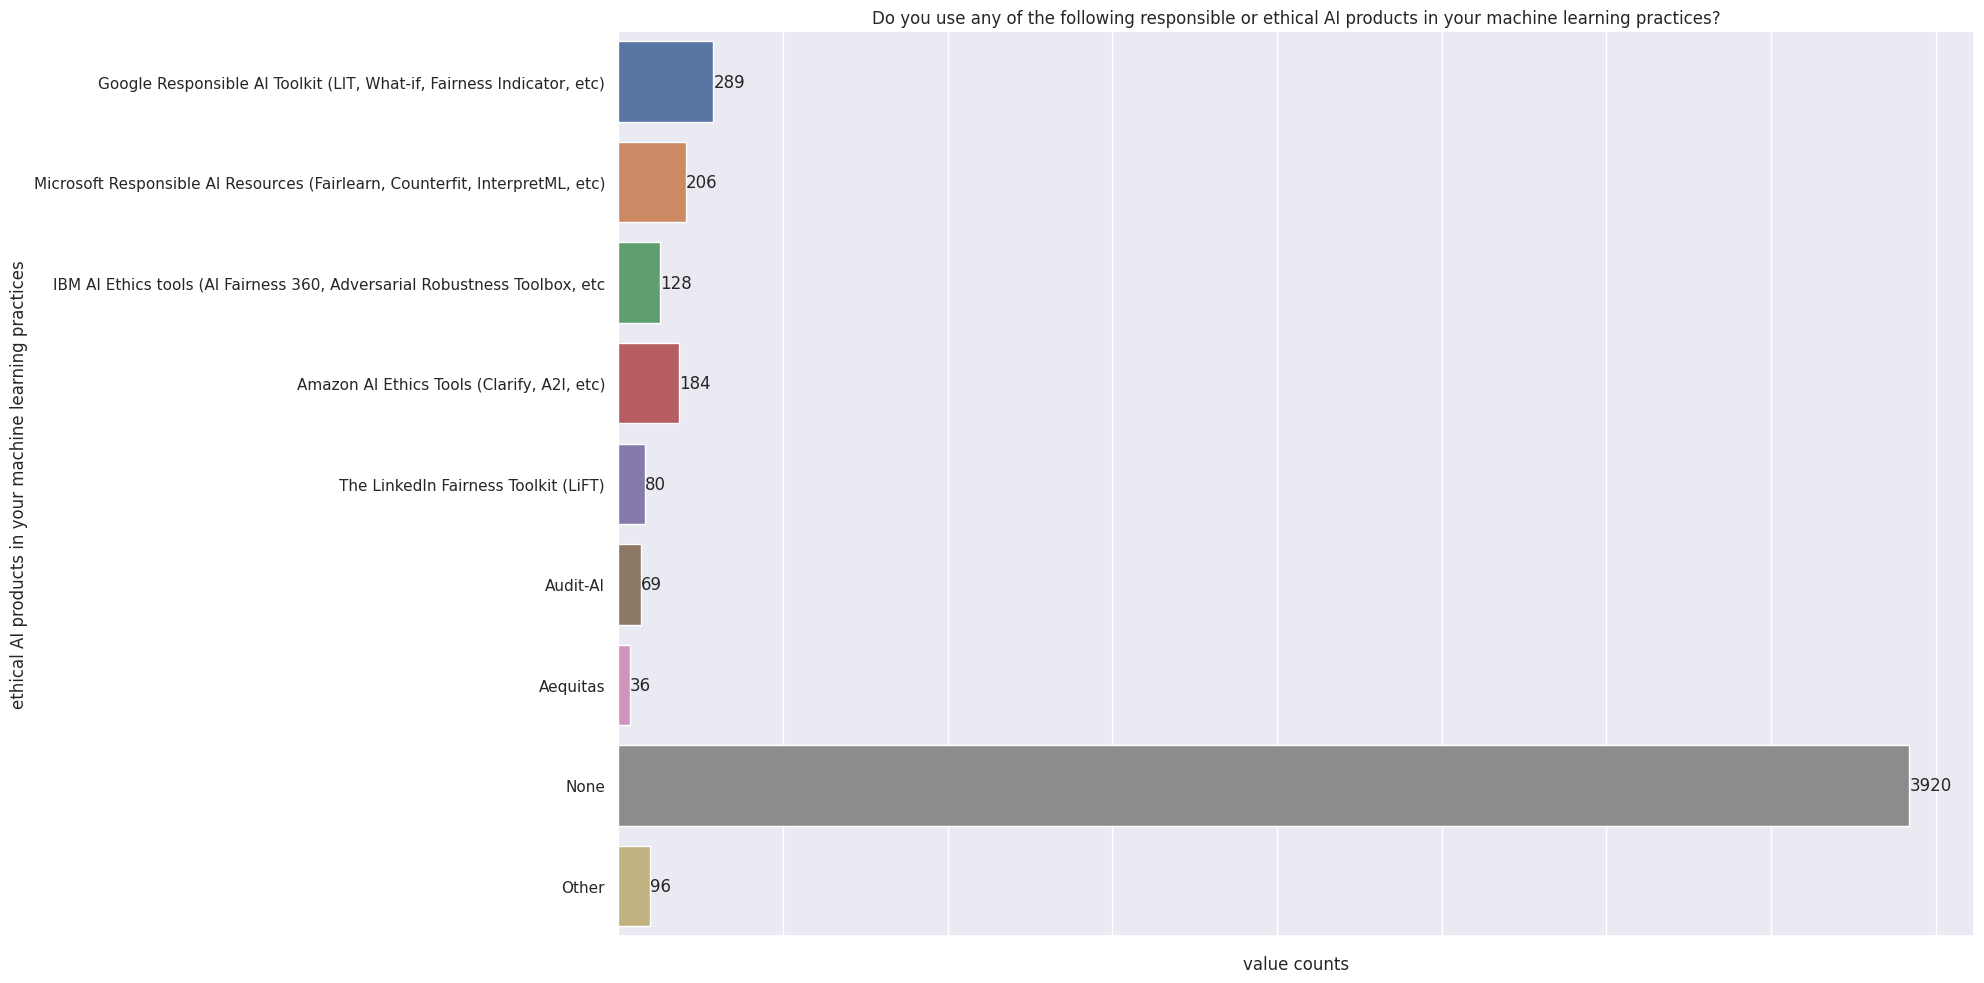

In [98]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['ethical AI products in your machine learning practices'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following responsible or ethical AI products in your machine learning practices?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q42****

In [99]:
Q42_choices=df.iloc[:, 274:283]
Q42_choices

Hardware-GPUs Hardware-TPUs Hardware-IPUs Hardware-RDUs Hardware-WSEs  \
1               NaN           NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN           NaN   
3               NaN           NaN           NaN           NaN           NaN   
4              GPUs           NaN           NaN           NaN           NaN   
5               NaN           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
23993           NaN           NaN           NaN           NaN           NaN   
23994           NaN           NaN           NaN           NaN           NaN   
23995           NaN           NaN           NaN           NaN           NaN   
23996           NaN           NaN           NaN           NaN           NaN   
23997           NaN           NaN           NaN           NaN           NaN   

      Hardware-Trainium Chips Hardware-Inferentia Chips Hardware-None  \
1                         NaN                       NaN           NaN   
2                         NaN                       NaN           NaN   
3                         NaN                       NaN           NaN   
4                         NaN                       NaN           NaN   
5                         NaN                       NaN           NaN   
...                       ...                       ...           ...   
23993                     NaN                       NaN           NaN   
23994                     NaN                       NaN           NaN   
23995                     NaN                       NaN          None   
23996                     NaN                       NaN           NaN   
23997                     NaN                       NaN           NaN   

      Hardware-Other  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
...              ...  
23993            NaN  
23994            NaN  
23995            NaN  
23996            NaN  
23997            NaN  

[23997 rows x 9 columns]

In [100]:
cols,value_cnts=[],[]
for i in Q42_choices.columns:
    cols.append(Q42_choices[i].unique()[1])
    value_cnts.append(Q42_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q42_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['specialized hardware when training machine learning models','value counts']
agg_data

specialized hardware when training machine learning models  value counts
0                                               GPUs                  2682
1                                               TPUs                   653
2                                               IPUs                    67
3                                               RDUs                    58
4                                               WSEs                    26
5                                     Trainium Chips                    39
6                                   Inferentia Chips                    58
7                                               None                  1772
8                                              Other                    70

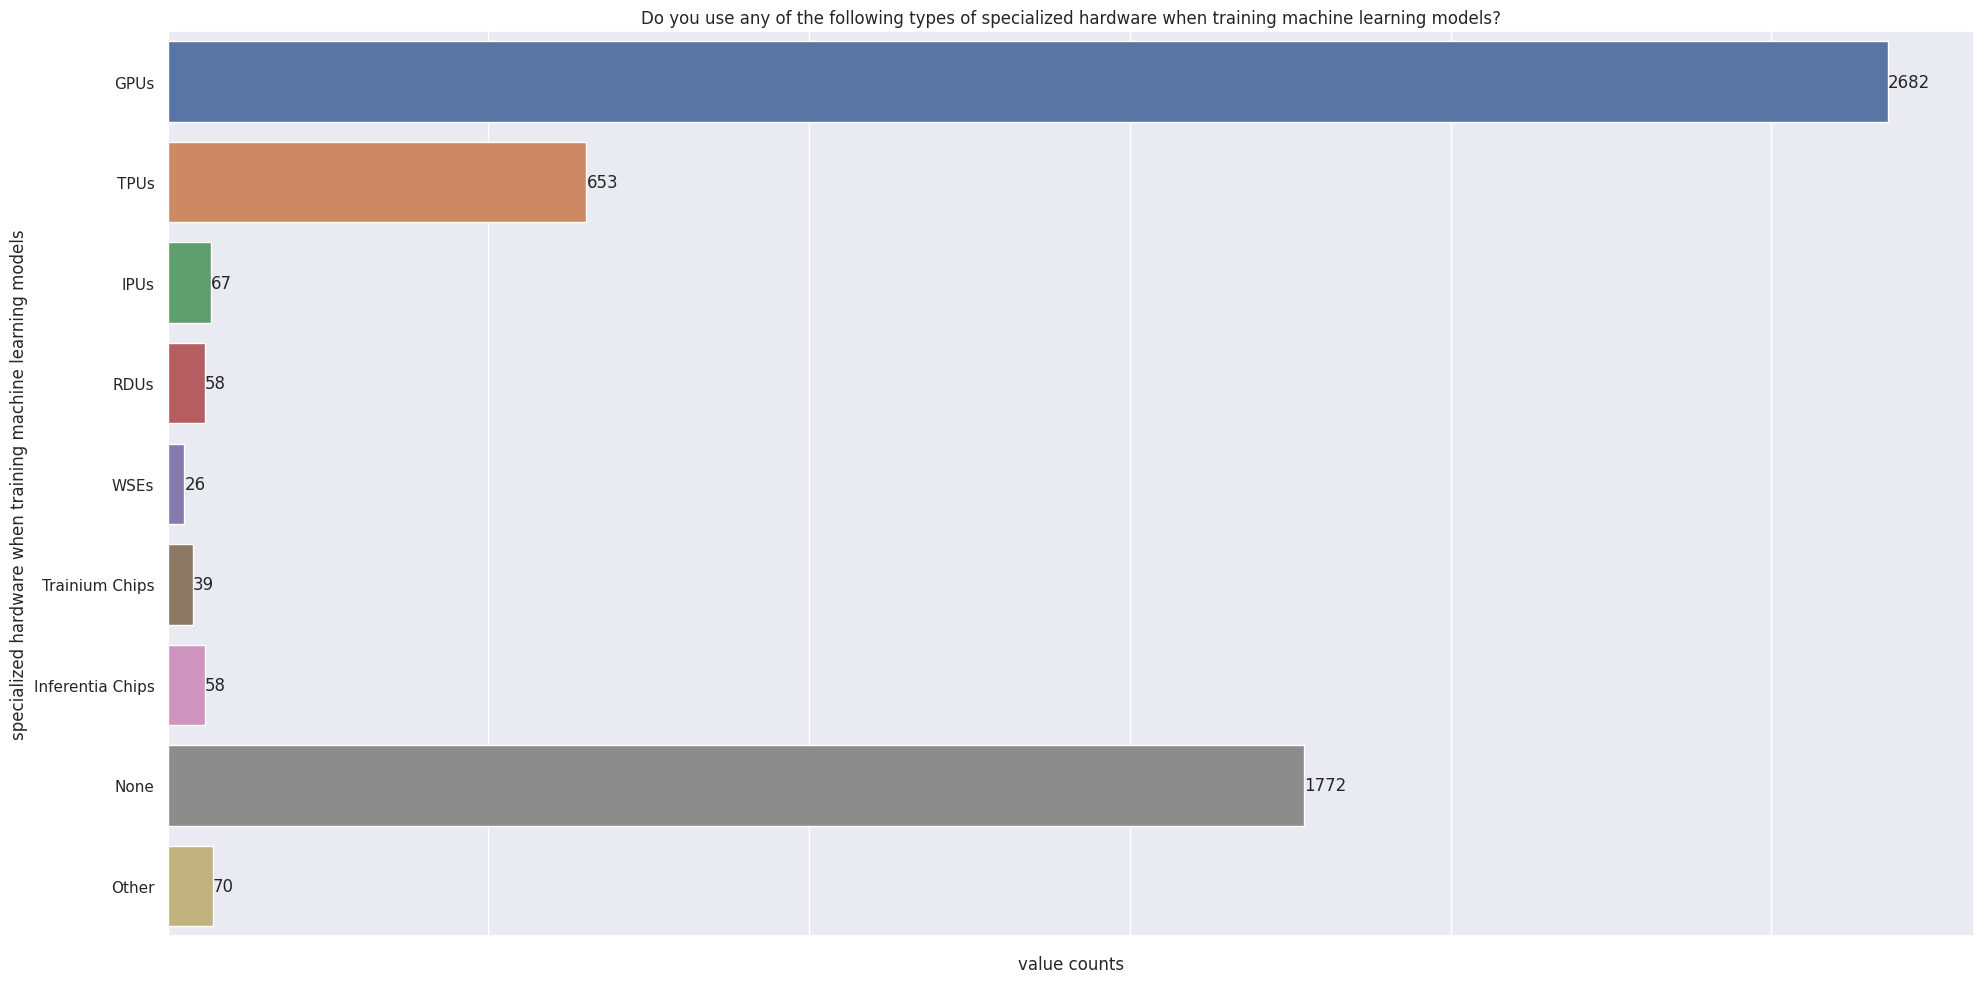

In [101]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['specialized hardware when training machine learning models'])
ax.bar_label(ax.containers[0])
ax.set_title('Do you use any of the following types of specialized hardware when training machine learning models?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()

****Q43****

In [102]:
Q43=df.iloc[:, 283]
Q43=pd.DataFrame(Q43)
Q43=Q43.groupby(['UsageOfTPUs']).size().reset_index()
Q43.columns=['UsageOfTPUs','value counts']
Q43

UsageOfTPUs  value counts
0           2-5 times           958
1          6-25 times           260
2  More than 25 times           225
3               Never          2538
4                Once           612

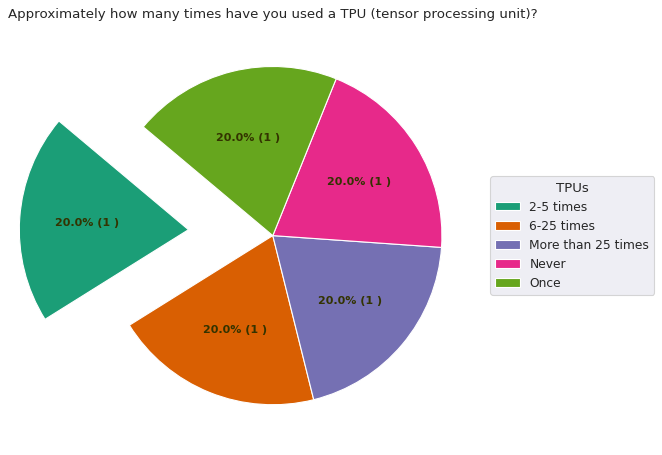

In [103]:
Q43q = Q43.groupby('UsageOfTPUs').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = Q43q['counts']
categories = Q43q['UsageOfTPUs']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)
explode = [0.5,0,0,0,0]

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="#333300"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

ax.legend(wedges, categories, title="TPUs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Approximately how many times have you used a TPU (tensor processing unit)?")
plt.show()

****Q44****

In [104]:
Q44_choices=df.iloc[:, 284:296]
Q44_choices

MediaSources-Twitter  \
1                                     NaN   
2                                     NaN   
3      Twitter (data science influencers)   
4      Twitter (data science influencers)   
5                                     NaN   
...                                   ...   
23993                                 NaN   
23994                                 NaN   
23995  Twitter (data science influencers)   
23996                                 NaN   
23997                                 NaN   

                          MediaSources-Email newsletters MediaSources-Reddit  \
1                                                    NaN                 NaN   
2                                                    NaN                 NaN   
3      Email newsletters (Data Elixir, O'Reilly Data ...                 NaN   
4                                                    NaN                 NaN   
5                                                    NaN                 NaN   
...                                                  ...                 ...   
23993                                                NaN                 NaN   
23994  Email newsletters (Data Elixir, O'Reilly Data ...                 NaN   
23995                                                NaN                 NaN   
23996                                                NaN                 NaN   
23997                                                NaN                 NaN   

                   MediaSources-Kaggle  \
1                                  NaN   
2                                  NaN   
3      Kaggle (notebooks, forums, etc)   
4      Kaggle (notebooks, forums, etc)   
5                                  NaN   
...                                ...   
23993  Kaggle (notebooks, forums, etc)   
23994                              NaN   
23995  Kaggle (notebooks, forums, etc)   
23996                              NaN   
23997                              NaN   

                              MediaSources-Course Forums  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      Course Forums (forums.fast.ai, Coursera forums...   
5                                                    NaN   
...                                                  ...   
23993                                                NaN   
23994                                                NaN   
23995                                                NaN   
23996                                                NaN   
23997                                                NaN   

                                    MediaSources-YouTube  \
1                                                    NaN   
2                                                    NaN   
3      YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23994  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23995  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23996  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23997                                                NaN   

                                   MediaSources-Podcasts  \
1                                                    NaN   
2                                                    NaN   
3      Podcasts (Chai Time Data Science, O’Reilly Dat...   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993  Podcasts (Chai Time Data Science, O’Reilly Dat...   
23994                                                NaN   
23995                           

In [105]:
cols,value_cnts=[],[]
for i in Q44_choices.columns:
    cols.append(Q44_choices[i].unique()[1])
    value_cnts.append(Q44_choices[i].value_counts()[0])
agg_data=dict(zip(cols,value_cnts))
Q44_choices.columns=agg_data
agg_data=pd.Series(agg_data,index=None)
agg_data=pd.DataFrame(agg_data).reset_index()
agg_data.columns=['media sources that report on data science topics','value counts']
agg_data

media sources that report on data science topics  value counts
0                  Twitter (data science influencers)          3995
1   Email newsletters (Data Elixir, O'Reilly Data ...          3787
2                     Reddit (r/machinelearning, etc)          2678
3                     Kaggle (notebooks, forums, etc)         11181
4   Course Forums (forums.fast.ai, Coursera forums...          4006
5   YouTube (Kaggle YouTube, Cloud AI Adventures, ...         11957
6   Podcasts (Chai Time Data Science, O’Reilly Dat...          2120
7   Blogs (Towards Data Science, Analytics Vidhya,...          7766
8   Journal Publications (peer-reviewed journals, ...          3804
9        Slack Communities (ods.ai, kagglenoobs, etc)          1726
10                                               None          1268
11                                              Other           835

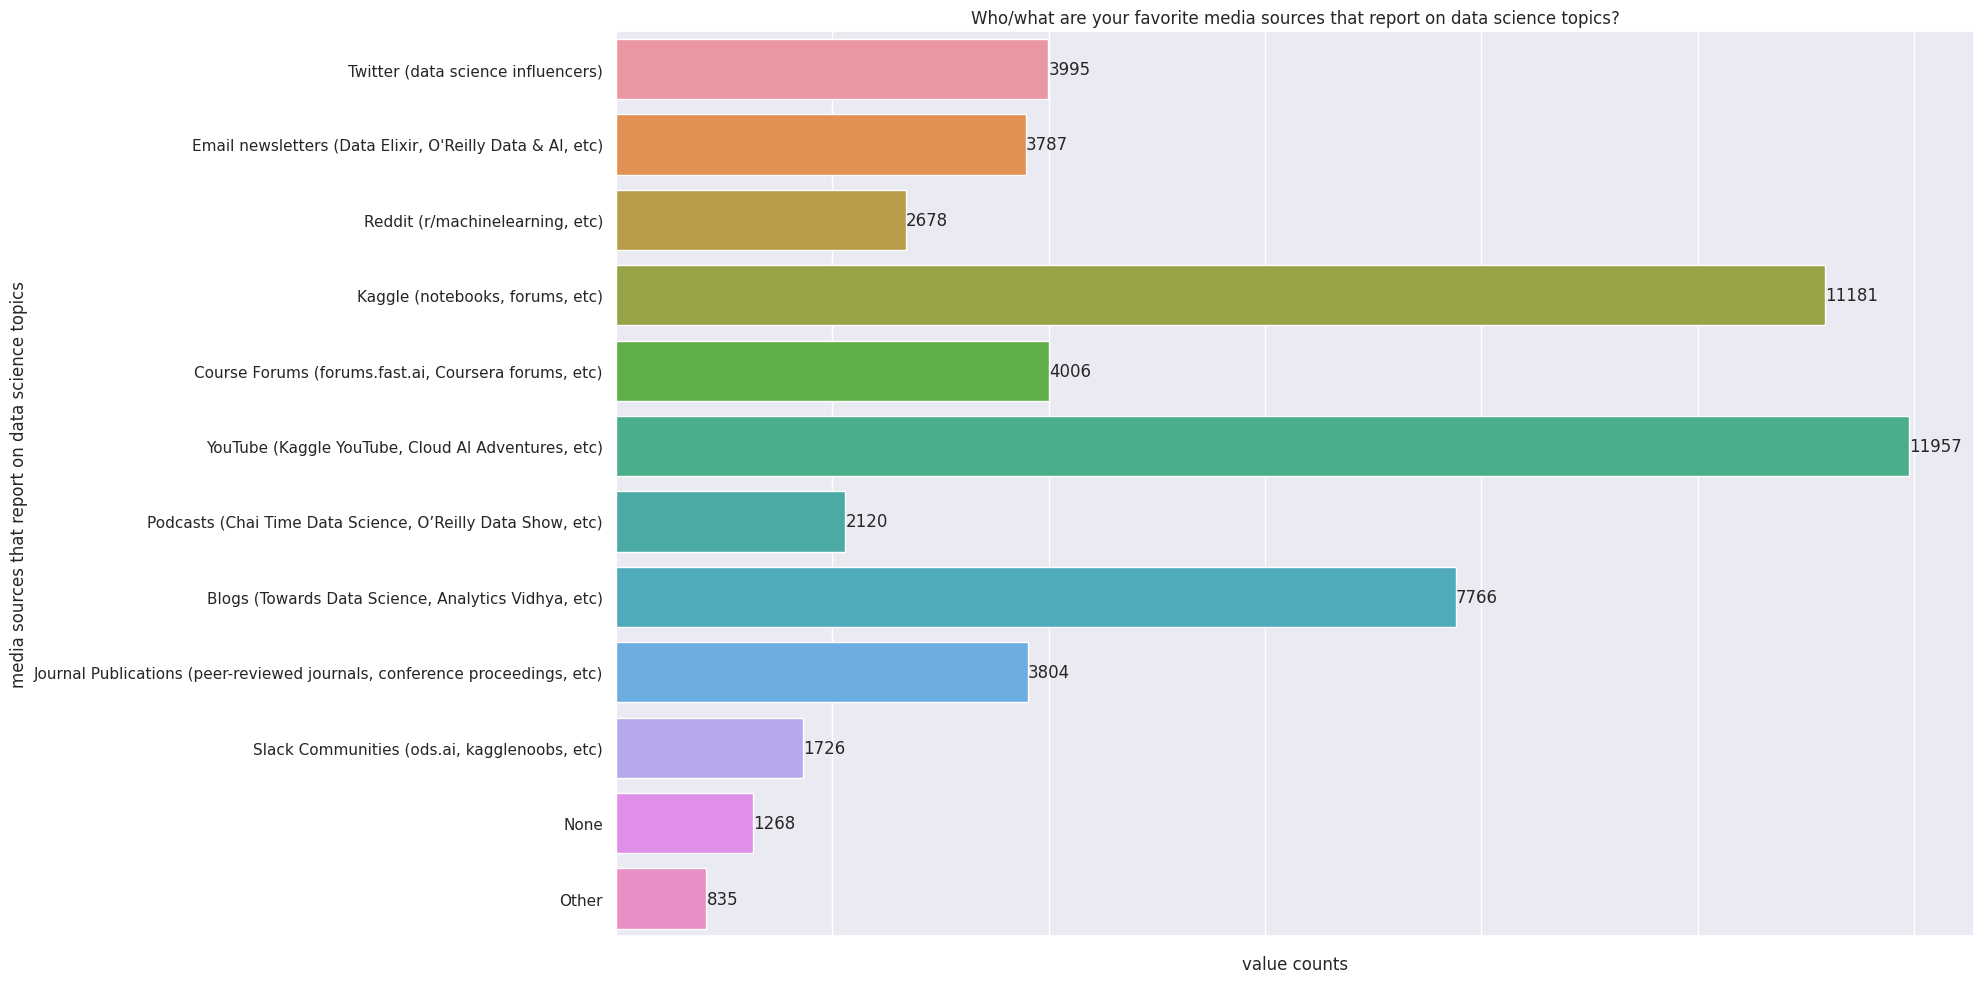

In [106]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.barplot(x=agg_data['value counts'],y=agg_data['media sources that report on data science topics'])
ax.bar_label(ax.containers[0])
ax.set_title('Who/what are your favorite media sources that report on data science topics?')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()